# Exploratory Data Analysis (EDA) of US Accidents and Prediction of Accident Severity in San Fransisco bay area.

### Project  Objective

There are 276.1 million registered vehicles in the USA according to Hedges and Company. More than 38000 people die every year in crashes on US roadways and the traffic fatality rate is 12.4 deaths per 100,000 inhabitants. An additional 4.4 million people are injured seriously enough to get medical attention. Road crashes are the leading cause of death in the US.

The objective of this project is to perform Exploratory Data Analysis (EDA) of the US accidents dataset to visualize the number of accidents by state, county, city, and the factors affecting the accident severity. Develop a model to accurately predict the accident severity which could enable emergency medical services (EMS) for a better allocation of the resources. 

### Project Overview

The dataset consists of location and time of the accident, weather conditions, road conditions, and accident severity (On a scale of 1 to 4). First, data cleaning of the dataset is performed to detect and correct or remove the corrupt records. Graphical techniques of EDA is used visualize the factors affecting the accident severity. Based on the EDA analysis, machine learning (ML) techniques: Logistic regression, KNN, Decision Tree Classifier, and Random Forest Classifier are used to develop a predictive model for accident severity. 

## Dataset Overview

The dataset is a 1GB file consist of 3 million accident data points with 49 columns. This is a countrywide car accident data set that covers 49 states of the USA. It has features like reporting sources of the accident, TMC, state, source, weather conditions, etc.

Link for kaggle dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents

<a id='TOC'></a>
Tabel of content
-----------------------

[1. Reading Data](#Reading_Data)

 $\;\;\;\;\;\;$[1.1. Summarizing Data](#Summarizing_Data)

 $\;\;\;\;\;\;$[1.2. Converting accident start and end time to year, month, day and time](#converting_time)

[2. Exploratory Data Analysis](#EDA)

$\;\;\;\;\;\;$[2.1. Reporting source of the accidents](#accidents_source)

$\;\;\;\;\;\;$[2.2. Accidents in different states](#state)

$\;\;\;\;\;\;$[2.3. Accidents in top 7 cities and in Norfolk, Virginia Beach and Hampton](#cities)

$\;\;\;\;\;\;$[2.4. Accidents in counties around Norfolk, Virginia Beach and Hampton](#county)

$\;\;\;\;\;\;$[2.5. Accidents in Norfolk streets](#streets)

$\;\;\;\;\;\;$[2.6. Side (Right/Left) of the accidents](#side)

$\;\;\;\;\;\;$[2.7. Influence of weather condition on accidents](#weather_condition)

$\;\;\;\;\;\;$[2.8. Accidents at different periods of the day](#period_day)

$\;\;\;\;\;\;$[2.9. Location of accidents](#location)

$\;\;\;\;\;\;$[2.10. Traffic Message Channel (TMC) Description for different accident](#TMC)

$\;\;\;\;\;\;$[2.11. Temperature affects on accidents](#temperature)

$\;\;\;\;\;\;$[2.12. Humidity, Pressure, wind speed and precipitation affects on accidents](#humidity)

$\;\;\;\;\;\;$[2.13. Affect of visibility on accidents](#visibility)

$\;\;\;\;\;\;$[2.14. Accidents by year](#year)

$\;\;\;\;\;\;$[2.15. Accidents in different months](#month)

$\;\;\;\;\;\;$[2.16. Accidents variation on daily basis](#day)

$\;\;\;\;\;\;$[2.17. Accidents on different days of a weel](#weekday)

$\;\;\;\;\;\;$[2.18. Accidents by hourly basis](#hour)

$\;\;\;\;\;\;$[2.19. Duration of traffic congestion due to accident](#duration)

[3.0. Machine learning model to predict severity in bay area](#ML)

$\;\;\;\;\;\;$[3.1. Correlation analysis](#CA)

$\;\;\;\;\;\;$[3.2. Train Test split](#TTsplit)

$\;\;\;\;\;\;$[3.3. Logistic regression](#LR)

$\;\;\;\;\;\;$[3.4. KNN](#KNN)

$\;\;\;\;\;\;$[3.5. Decision Tree Classifier](#DTC)

$\;\;\;\;\;\;$[3.6. Random Forest Classifier](#RFC)

$\;\;\;\;\;\;$[3.7. Removing Severity outliers](#Routliers)

[4.0. Summary and conclusions](#Summary)

<a id='Reading_Data'></a>
#### 1. Reading Data

In [1]:
#Starting by resetting all variables previously defined in this jupyter notebook
%reset -f

In [2]:
import numpy as np
import seaborn as sns
from scipy import stats, integrate
import matplotlib.pyplot as plt
import statistics
import math
import pandas as pd
pd.options.display.max_rows==1000
pd.options.display.max_columns==1000
from datetime import datetime
import pandas_datareader.data as web

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
%%time
#Computational time ~ 25.9 s
US_data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec19.csv')
print("The shape of US_data is:",(US_data.shape))
display(US_data.head(3))

The shape of US_data is: (2974335, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day


CPU times: user 27.4 s, sys: 4.04 s, total: 31.4 s
Wall time: 45.6 s


<a id='summarizing_data'></a>
#### 1.2 Summarizing Data

In [4]:
%%time
#Computational time ~ 12.3 s
#-----------------------------
#Function to summarize details in US accidents data
def summary_fun(US_data):
    NAN_cnt=[] #Number of cells with NAN
    prcnt_NAN=[] #
    action=[]
    remove_columns=[]
    replace_columns=[]
    uniq_cnt=[]
    data_type=[]

    Nd=US_data.shape[0]
    for clmn in US_data.columns:

        NAN_c=Nd-US_data[clmn].count()
        prcnt_c=NAN_c/Nd*100
        uniq_c=US_data[clmn].nunique()
        dtype_c=US_data[clmn].dtypes

        NAN_cnt.append(NAN_c)
        prcnt_NAN.append(prcnt_c)
        uniq_cnt.append(uniq_c)
        data_type.append(str(dtype_c))

        if prcnt_c>0.0:
            act="ReplaceNANs"
            replace_columns.append(clmn)
        else:
            act="None"

        if uniq_c==1:
            act="Remove Column"
            remove_columns.append(clmn)

        action.append(act)


    data_details=pd.DataFrame({"Data Type":data_type,
                           "Unique count":uniq_cnt,
                           "NAN Count":NAN_cnt,
                           "Percent(NAN)":prcnt_NAN,
                           "Action":action},index=US_data.columns)
    
    return remove_columns,replace_columns,data_details
#-----------------------
def highlight_remove(s):
    '''
    highlight the remove in a Series with red.
    '''
    #Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
    
    if s=="ReplaceNANs":
        color="green"
    elif s=="Remove Column":
        color="red"
    else:
        color="white"
  
    return 'background-color: %s'% color
#------------------------
def display_pandas_data(pandas_data):
    display(pandas_data.style.applymap(highlight_remove))
#----------------------------------------------------------------------------------------
remove_columns,replace_columns,data_details=summary_fun(US_data)

print("This function will summarize the details of columns of accidents dataset like data type, unique count, percentage of NAN count and shows the action that needs to be done during EDA.")
display_pandas_data(data_details)


This function will summarize the details of columns of accidents dataset like data type, unique count, percentage of NAN count and shows the action that needs to be done during EDA.


,Data Type,Unique count,NAN Count,Percent(NAN),Action
ID,object,2974335,0,0.000000,None
Source,object,3,0,0.000000,None
TMC,float64,21,728071,24.478446,ReplaceNANs
Severity,int64,4,0,0.000000,None
Start_Time,object,2743101,0,0.000000,None
End_Time,object,2761499,0,0.000000,None
Start_Lat,float64,1002359,0,0.000000,None
Start_Lng,float64,985099,0,0.000000,None
End_Lat,float64,298605,2246264,75.521554,ReplaceNANs
End_Lng,float64,302906,2246264,75.521554,ReplaceNANs


CPU times: user 12.4 s, sys: 106 ms, total: 12.6 s
Wall time: 12.7 s


In [5]:
%%time
#Computational time: 8.81 s
#-----------------------------------------------------------------------------------------
#Function to append remove_columns list
def remove_columns_append(remove_columns,columns):   
    for clmn in columns:
        remove_columns.append(clmn)
    return remove_columns
#----------------------------------------------------------------------------------------
#Function to remove columns that are in remove_columns from pandas data
def fun_remove_columns(pandas_data,remove_columns):
    for clmn in remove_columns:
        if clmn in pandas_data.columns:
            pandas_data.pop(clmn)
    return pandas_data
#----------------------------------------------------------------------------------------
#Removing some columns
remove_columns=remove_columns_append(remove_columns,["Description","End_Lat","End_Lng","ID"])

print("Removing columns:",remove_columns)
US_data=fun_remove_columns(US_data,remove_columns)

remove_columns,replace_columns,data_details=summary_fun(US_data)


Removing columns: ['Country', 'Turning_Loop', 'Description', 'End_Lat', 'End_Lng', 'ID']
CPU times: user 11 s, sys: 2.11 s, total: 13.1 s
Wall time: 13.1 s


Note: The function removes the required column names without any error if the cell is rerun.

<a id='converting_time'></a>
#### 1.3 Converting accident start and end time to year, month, day and time

The Start_time and End_time are converted in to year, month, weekday, hour,minute and duration.

In [6]:
%%time
#Computational time: 9.42 s
# Converting start_time, end_time to get year, month, day, hour and minute of a day and get duration 
#to clear accident from Start_time and End_time
# Ref for pd.to_datetime :https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
US_data["Start_Time"] = pd.to_datetime(US_data["Start_Time"], errors='coerce')
US_data["End_Time"] = pd.to_datetime(US_data["End_Time"], errors='coerce')

#Finding the number of year
US_data['Year']=US_data["Start_Time"].dt.year

#Finding the month
nmonth=US_data["Start_Time"].dt.month
US_data['Month']=nmonth

#Finding the day of a year
days_each_month=np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday=[days_each_month[arg-1] for arg in nmonth.values]
nday=nday+US_data["Start_Time"].dt.day.values
US_data['Day']=nday

#Finding the weekday
US_data['Weekday']=US_data["Start_Time"].dt.weekday

#Finding the hour of day
US_data['Hour']=US_data["Start_Time"].dt.hour

#Finding the minute of the day
US_data['Minute']=US_data['Hour']*60.0+US_data["Start_Time"].dt.minute

# Ref for np.timedelta64: https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html
US_data['Duration']=(US_data["End_Time"]-US_data["Start_Time"])/np.timedelta64(1,'m')

CPU times: user 6.36 s, sys: 1.09 s, total: 7.45 s
Wall time: 7.42 s


In [7]:
%%time
#Removing columns
#Computation time ~ 4 ms
remove_columns=remove_columns_append(remove_columns,["Start_Time","End_Time"])
US_data=fun_remove_columns(US_data,remove_columns)

CPU times: user 2.38 ms, sys: 51 µs, total: 2.43 ms
Wall time: 2.21 ms


<a id='EDA'></a>
#### 2.0 Exploratory Data Analysis

Seveirty values: [3 2 1 4]


,1,2,3,4
Severity,968,1993410,887620,92337


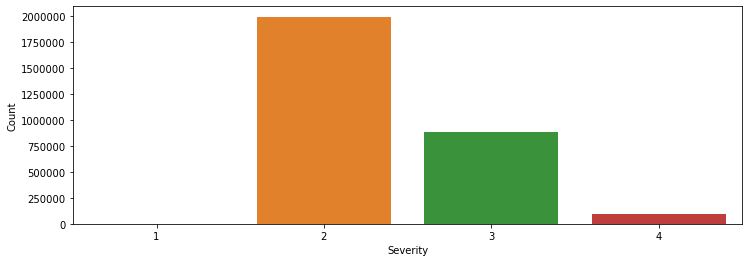

CPU times: user 1.41 s, sys: 461 ms, total: 1.87 s
Wall time: 1.88 s


In [8]:
%%time
#Computational time: 1.79 s
#Visualizing Severity
severity_vals=US_data["Severity"].unique()
print("Seveirty values:",severity_vals)

severity_count={}
severity_count[1]=US_data[US_data["Severity"]==1].shape[0]
severity_count[2]=US_data[US_data["Severity"]==2].shape[0]
severity_count[3]=US_data[US_data["Severity"]==3].shape[0]
severity_count[4]=US_data[US_data["Severity"]==4].shape[0]

frame=pd.DataFrame(severity_count,index=["Severity"])
display(frame)

fig=plt.figure(figsize=(12,4))
sns.barplot(list(severity_count.keys()),list(severity_count.values()))
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


Observation: The first total number of accidents with different severity levels is plotted. Orange bar in the plot shows the total number of accidents with severity level 2, which is the most with around 2 million accidents followed by severity level 3 shown by the green bar and then followed by severity level 4. Whereas there are very few numbers of accidents with severity level 1.

In [9]:
%%time
#Computation time ~ 43 ms
#Categorizing columns into numerical, boolian and categorical columns
num_columns_details=data_details.loc[data_details["Data Type"].isin(["int64","float64"])]
bool_columns_details=data_details[data_details["Data Type"].isin(["bool"])]
cat_columns_details=data_details[data_details["Data Type"]=="object"]

print("First visualizing categorical columns:")
display_pandas_data(cat_columns_details)

First visualizing categorical columns:


,Data Type,Unique count,NAN Count,Percent(NAN),Action
Source,object,3,0,0.000000,None
Start_Time,object,2743101,0,0.000000,None
End_Time,object,2761499,0,0.000000,None
Street,object,160715,0,0.000000,None
Side,object,3,0,0.000000,None
City,object,11685,83,0.002791,ReplaceNANs
County,object,1713,0,0.000000,None
State,object,49,0,0.000000,None
Zipcode,object,377152,880,0.029586,ReplaceNANs
Timezone,object,4,3163,0.106343,ReplaceNANs


CPU times: user 146 ms, sys: 11.9 ms, total: 158 ms
Wall time: 156 ms


Observation: Dividing the columns into categorical, boolean, and numerical. First visualizing the categorical columns of the US_data set.

In [10]:
%%time
#Computation time ~ 1.19 s
remove_columns=remove_columns_append(remove_columns,["Zipcode","Airport_Code","Weather_Timestamp","Wind_Direction"])  
US_data=fun_remove_columns(US_data,remove_columns)

CPU times: user 1.6 s, sys: 1.48 s, total: 3.08 s
Wall time: 3.07 s


<a id='source'></a>
#### 2.1 Reporting source of the accidents

,Severity 1,Severity 2,Severity 3,Severity 4,Total
MapQuest,958,1444124,754247,4769,2204098
Bing,0,525341,115197,87533,728071
MapQuest-Bing,10,23945,18176,35,42166


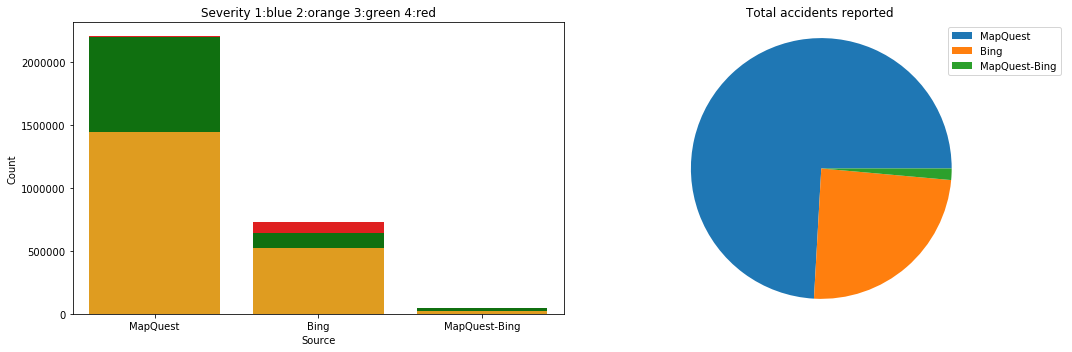

CPU times: user 3.25 s, sys: 521 ms, total: 3.77 s
Wall time: 3.17 s


In [11]:
%%time
#Computational time ~ 3.17 s
#First visualizing source
#------------------------------
#Functiong to create a frame visualizing number of accidents with each severity for a given column name
def visualize_severity_detailed(US_data,column_name,decending_order=True):
    
    unique_types=np.sort(US_data[column_name].unique())
    unique_details={"Severity 1":[],"Severity 2":[],"Severity 3":[],"Severity 4":[],"Total":[]}

    for arg in unique_types:
        dum=US_data[US_data[column_name]==arg]

        unique_details["Total"].append(dum.shape[0])
        unique_details["Severity 1"].append(dum[dum["Severity"]==1].shape[0])
        unique_details["Severity 2"].append(dum[dum["Severity"]==2].shape[0])
        unique_details["Severity 3"].append(dum[dum["Severity"]==3].shape[0])
        unique_details["Severity 4"].append(dum[dum["Severity"]==4].shape[0])

    unique_details["Total"]=np.asarray(unique_details["Total"])
    unique_details["Severity 1"]=np.asarray(unique_details["Severity 1"])
    unique_details["Severity 2"]=np.asarray(unique_details["Severity 2"])
    unique_details["Severity 3"]=np.asarray(unique_details["Severity 3"])
    unique_details["Severity 4"]=np.asarray(unique_details["Severity 4"])
    
    if decending_order:

        ind=np.argsort(unique_details['Total'])
        ind=np.flip(ind)

        unique_types=unique_types[list(ind)]
        unique_details['Total']=unique_details['Total'][ind]
        unique_details['Severity 1']=unique_details['Severity 1'][ind]
        unique_details['Severity 2']=unique_details['Severity 2'][ind]
        unique_details['Severity 3']=unique_details['Severity 3'][ind]
        unique_details['Severity 4']=unique_details['Severity 4'][ind]    

    frame=pd.DataFrame(unique_details,index=unique_types)
    display(frame)
    
    return unique_types,unique_details
#------------------------------
#Visualizing source details
source_types,source_details=visualize_severity_detailed(US_data,column_name="Source")

#Barplot
fig=plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(source_types,source_details["Severity 1"],color="blue")
sns.barplot(source_types,source_details["Severity 2"],bottom=source_details["Severity 1"],color="orange")
sns.barplot(source_types,source_details["Severity 3"],bottom=source_details["Severity 2"]+source_details["Severity 1"],color="green")
sns.barplot(source_types,source_details["Severity 4"],bottom=source_details["Severity 3"]+source_details["Severity 2"]+source_details["Severity 1"],color="red")
plt.title("Severity 1:blue 2:orange 3:green 4:red")
plt.xlabel("Source")
plt.ylabel("Count")

#Pie chart
sizes = [arg/sum(source_details["Total"]) for arg in source_details["Total"]]
plt.subplot(122)
patches, texts = plt.pie(sizes)
plt.title("Total accidents reported")
plt.legend(patches, source_types, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


Observation: In the above figure, I have created a frame listing the total number of accidents reported by different sources and plotted a stacked bar chart and a pie chart. It can be observed that MapQUest reported the maximum number of accidents as represented by the blue color in the pie chart. The bar chart shows the total number of accidents reported by each source and also the number of accidents with different severity levels is highlighted in the bar chart. Orange shows the total number of accidents with severity level 2, which is maximum, green shows severity 3, red shows severity 4 and blue shows severity 1, which cannot be seen in the barplot because of very less number of accidents with severity 1. In this entire notebook, the colors for the severity level are retained whenever a stacked bar chart is plotted.

In [12]:
%%time
#Computational time ~ 157 ms
#Source only reports accidents but not affect severity
remove_columns=remove_columns_append(remove_columns,["Source"])
US_data=fun_remove_columns(US_data,remove_columns)

CPU times: user 346 ms, sys: 293 ms, total: 638 ms
Wall time: 632 ms


<a id='state'></a>
#### 2.2 Accidents in different states

In [13]:
%%time
#Computational time ~ 12.5
#Unique state names
state_names=list(US_data["State"].unique())

state_details={"Total accidents":[],"Severity(%) 1":[],"Severity(%) 2":[],
               "Severity(%) 3":[],"Severity(%) 4":[]}

for state in state_names:
    dum=US_data[US_data["State"]==state]
    tot_acci=dum.shape[0]
    
    state_details["Total accidents"].append(tot_acci)
    
    sev_cnt=dum[dum["Severity"]==1].shape[0]        
    state_details["Severity(%) 1"].append(sev_cnt/tot_acci*100)

    sev_cnt=dum[dum["Severity"]==2].shape[0]        
    state_details["Severity(%) 2"].append(sev_cnt/tot_acci*100)
    
    sev_cnt=dum[dum["Severity"]==3].shape[0]        
    state_details["Severity(%) 3"].append(sev_cnt/tot_acci*100)

    sev_cnt=dum[dum["Severity"]==4].shape[0]        
    state_details["Severity(%) 4"].append(sev_cnt/tot_acci*100)

print("Frame listing total number of accidents in each sate and percentage of accidents with different severity level")
frame=pd.DataFrame(state_details,index=state_names)
display(frame)


Frame listing total number of accidents in each sate and percentage of accidents with different severity level


,Total accidents,Severity(%) 1,Severity(%) 2,Severity(%) 3,Severity(%) 4
OH,55863,0.028641,60.535596,30.533627,8.902136
WV,2274,0.043975,59.454705,20.536500,19.964820
CA,663204,0.037093,67.155958,31.843746,0.963203
FL,223746,0.031732,64.636686,32.014427,3.317154
GA,83620,0.032289,41.383640,50.697202,7.886869
SC,146689,0.027269,77.946540,21.382653,0.643538
NE,22505,0.053321,83.839147,14.974450,1.133082
IA,10346,0.028997,45.215542,46.665378,8.090083
IL,86390,0.017363,68.180345,28.598217,3.204075
MO,29012,0.024128,43.002895,52.012960,4.960017


CPU times: user 12.8 s, sys: 96.5 ms, total: 12.9 s
Wall time: 12.9 s


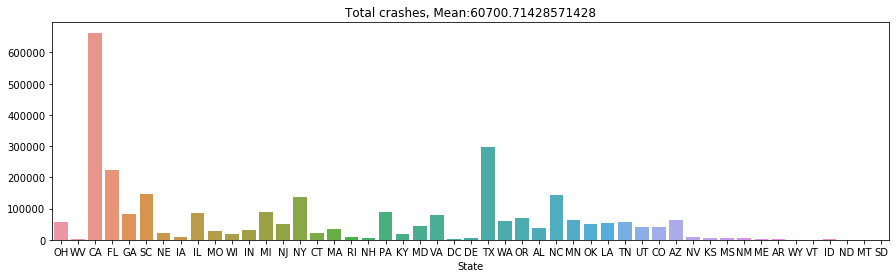

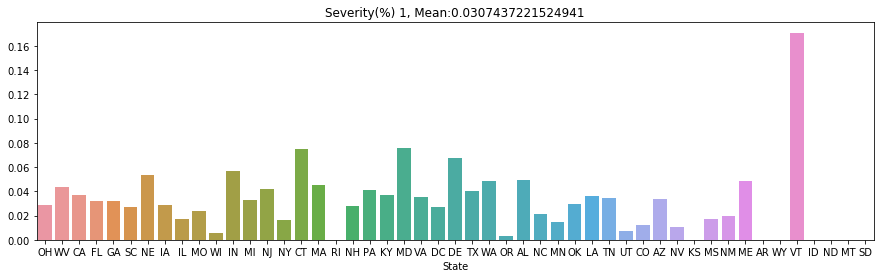

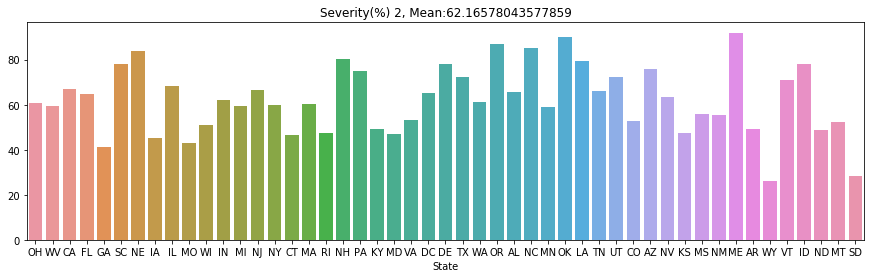

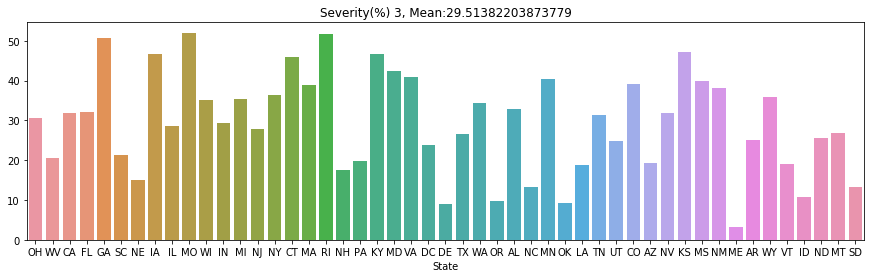

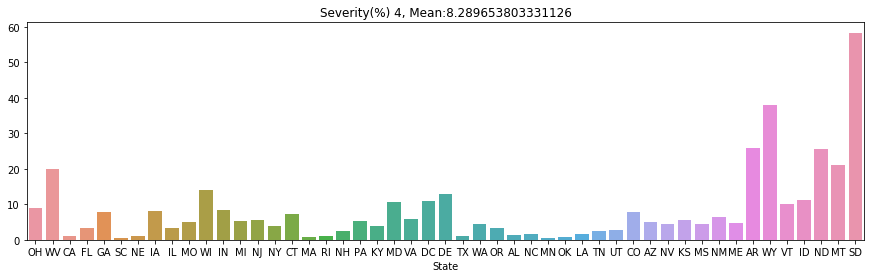

Sum of means of all sverity: 99.97 %
CPU times: user 2.88 s, sys: 92.9 ms, total: 2.98 s
Wall time: 2.96 s


In [14]:
%%time
#COmputational time ~ 2.99 s
fig=plt.figure(figsize=(15,4))
sns.barplot(state_names,state_details["Total accidents"])
plt.xlabel("State")
mu=np.mean(state_details["Total accidents"])
plt.title("Total crashes, Mean:"+str(mu))
plt.show()

mu=np.mean(state_details["Severity(%) 1"])
fig=plt.figure(figsize=(15,4))
sns.barplot(state_names,state_details["Severity(%) 1"])
plt.xlabel("State")
plt.title("Severity(%) 1, Mean:"+str(mu))
plt.show()

fig=plt.figure(figsize=(15,4))
sns.barplot(state_names,state_details["Severity(%) 2"])
plt.xlabel("State")
mu=np.mean(state_details["Severity(%) 2"])
plt.title("Severity(%) 2, Mean:"+str(mu))
plt.show()

fig=plt.figure(figsize=(15,4))
sns.barplot(state_names,state_details["Severity(%) 3"])
plt.xlabel("State")
mu=np.mean(state_details["Severity(%) 3"])
plt.title("Severity(%) 3, Mean:"+str(mu))
plt.show()

fig=plt.figure(figsize=(15,4))
sns.barplot(state_names,state_details["Severity(%) 4"])
plt.xlabel("State")
mu=np.mean(state_details["Severity(%) 4"])
plt.title("Severity(%) 4, Mean:"+str(mu))
plt.show()

print("Sum of means of all sverity: 99.97 %")

In [15]:
state_details

{'Total accidents': [55863,
  2274,
  663204,
  223746,
  83620,
  146689,
  22505,
  10346,
  86390,
  29012,
  17580,
  30040,
  88694,
  49942,
  137799,
  22803,
  33014,
  10483,
  7064,
  90395,
  19122,
  43328,
  79957,
  3653,
  4434,
  298062,
  61367,
  70840,
  36369,
  142460,
  62727,
  51297,
  52481,
  58289,
  41385,
  40124,
  62330,
  9524,
  6887,
  5961,
  5020,
  2065,
  1749,
  492,
  585,
  1757,
  43,
  504,
  60],
 'Severity(%) 1': [0.028641497950342806,
  0.04397537379067722,
  0.03709265927226012,
  0.03173241085874161,
  0.03228892609423583,
  0.027268575012441287,
  0.053321484114641195,
  0.028996713705780015,
  0.017363120731566154,
  0.02412794705639046,
  0.005688282138794084,
  0.05659121171770973,
  0.03269668748731594,
  0.042048776580833766,
  0.015965282766928643,
  0.07455159408849713,
  0.045435269885503116,
  0.0,
  0.028312570781426957,
  0.04093146744842082,
  0.03660704947181257,
  0.07616322008862629,
  0.03501882261715673,
  0.027374760470

Observation: In the above figure, I have created a frame listing the total number of accidents reported by different sources and plotted a stacked bar chart and a pie chart. It can be observed that MapQUest reported the maximum number of accidents as represented by the blue color in the pie chart. The bar chart shows the total number of accidents reported by each source and also the number of accidents with different severity levels is highlighted in the bar chart. Orange shows the total number of accidents with severity level 2, which is maximum, green shows severity 3, red shows severity 4 and blue shows severity 1, which cannot be observed in the barplot because of very less number of accidents with severity 1. In this entire notebook, the colors for the severity level are retained whenever a stacked bar chart is plotted.

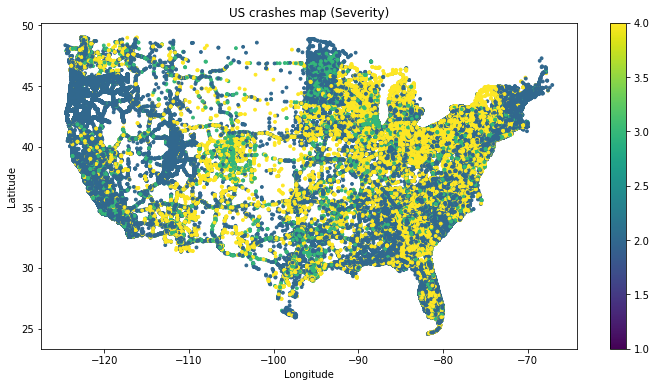

CPU times: user 1min 23s, sys: 206 ms, total: 1min 24s
Wall time: 1min 23s


In [16]:
%%time
#Computational time ~ 1 min 37 sec
#Plotting latitudes and longitude (Takes long time)
plt.figure(figsize=(12, 6))
# (Scatter plot is Taking long time due to color(c))
plt.scatter(US_data["Start_Lng"],US_data["Start_Lat"],s=8,c=US_data["Severity"])
plt.colorbar()
# plt.plot(US_data["Start_Lng"],US_data["Start_Lat"],'o',markersize=2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("US crashes map (Severity)")
plt.show()

Observation: The scatter plot shows the accident map and color represents the severity level. It can be observed that the east coast, west coast, and Michigan areas have a lot of accidents. This is because these areas are most industrialized and have large population density. Whereas central America has a few numbers of accidents. It is also observed that the accident severity level is high in Michigan which is highlighted by yellow color.

Plotting the latitude and longitude with time zones.

{'US/Eastern': 1, 'US/Pacific': 2, 'US/Central': 3, 'US/Mountain': 4}


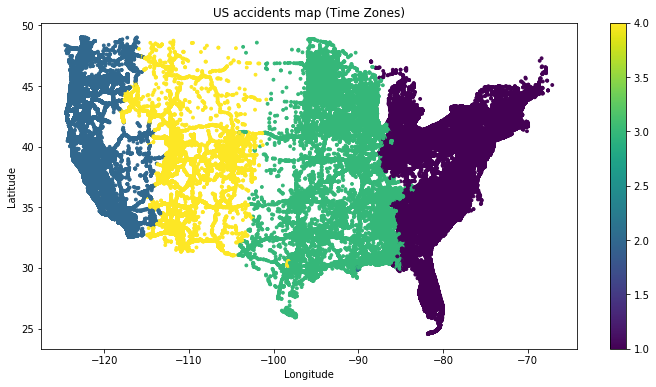

CPU times: user 1min 24s, sys: 249 ms, total: 1min 24s
Wall time: 1min 23s


In [17]:
%%time
#Computational time ~ 1 min 38 s
#Plotting Time zones (Takes long time)
TimeZone=US_data[["Start_Lng","Start_Lat","Timezone"]]
TimeZone=TimeZone.dropna()
TimeZone_vals=list(TimeZone["Timezone"].unique())

#Labeling the time zones to plot
labels={}
flag=1
for arg in TimeZone_vals:
    labels[arg]=flag
    flag=flag+1
print(labels)
colorbars=[labels[arg] for arg in TimeZone["Timezone"]]

#Plotting the Latidue and longitude with time zones
plt.figure(figsize=(12, 6))
# (Scatter plot is Taking long time due to color(c))
plt.scatter(TimeZone["Start_Lng"],TimeZone["Start_Lat"],s=8,c=colorbars)
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("US accidents map (Time Zones)")
plt.show()


Observation: The above figure shows US time zones and as exaplined in previous plot, the accidents are more in east coast and west coast.

In [18]:
%%time
#Computation time ~ 0 ns
remove_columns=remove_columns_append(remove_columns,["Timezone"])
US_data=fun_remove_columns(US_data,remove_columns)

CPU times: user 193 ms, sys: 268 ms, total: 461 ms
Wall time: 455 ms


<a id='cities'></a>
#### 2.3 Accidents in top 7 cities and in Norfolk, Virginia Beach and Hampton

,Number,City rank
Houston,93289,1
Charlotte,68054,2
Los Angeles,65851,3
Austin,58703,4
Dallas,58036,5
Raleigh,39628,6
Atlanta,37591,7
Norfolk,3560,123
Virginia Beach,1740,264
Hampton,1118,451


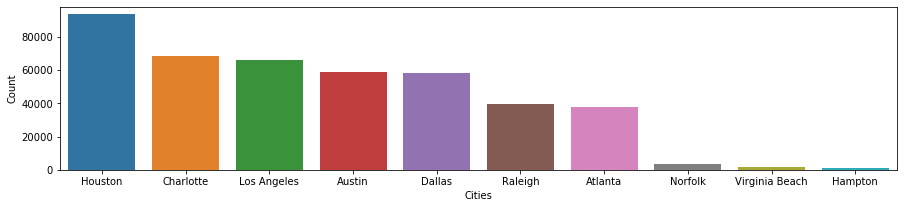

CPU times: user 842 ms, sys: 7.06 ms, total: 849 ms
Wall time: 845 ms


In [19]:
%%time
#Computation time ~ 771 ms
#Accidents in top7 and in "Norfolk","Virginia Beach","Hampton"
cities=US_data["City"].unique()

dum=US_data["City"].value_counts().sort_values(ascending=False)
int_cities=list(dum[:7].index)
nacci_cities=list(dum[:7].values)
city_rank=list(np.arange(1,8))

int_cities.append("Norfolk"); 
nacci_cities.append(dum["Norfolk"])
city_rank.append(list(dum.index).index("Norfolk")+1)

int_cities.append("Virginia Beach"); 
nacci_cities.append(dum["Virginia Beach"])
city_rank.append(list(dum.index).index("Virginia Beach")+1)

int_cities.append("Hampton");
nacci_cities.append(dum["Hampton"])
city_rank.append(list(dum.index).index("Hampton"))

frame=pd.DataFrame({"Number":nacci_cities,"City rank":city_rank},index=int_cities)
display(frame)

fig=plt.figure(figsize=(15,3))
sns.barplot(int_cities,nacci_cities)
plt.xlabel("Cities")
plt.ylabel("Count")
plt.show()

Observation: In the above output, frame lists the top 7 cities with the most number of accidents followed by the Norfolk, Virginia Beach, and Hampton. Houston has the most number of accidents with 93000, followed by Charlotte and Los Angels. Compared to the top 7 cities, the number of accidents in Norfolk, Virginia Beach, and Hampton is negligible and they rank more than 123.

<a id='county'></a>
#### 2.4 Accidents in counties around Norfolk, Virginia Beach and Hampton

,County
Norfolk,3483
Virginia Beach,1719
Hampton,796
Norfolk City,60
Virginia Beach City,21
Hampton City,7


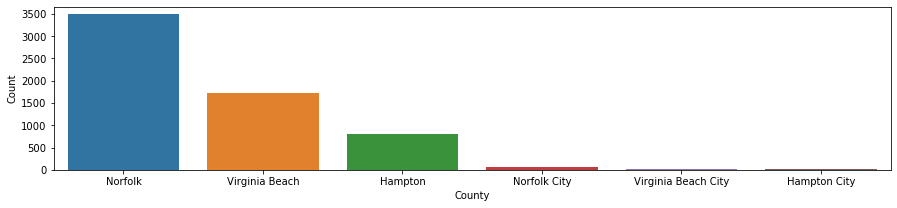

CPU times: user 296 ms, sys: 13 ms, total: 309 ms
Wall time: 303 ms


In [20]:
%%time
#Computational time ~ 286 ms
#Visualizing accidients in counties around "Norfolk","Virginia Beach","Hampton"
int_cities=["Norfolk","Virginia Beach","Hampton"]
VA_accid=US_data.loc[US_data["State"].isin(["VA"])]
local_accid=VA_accid.loc[VA_accid["City"].isin(int_cities)]
VA_county=local_accid["County"].value_counts().sort_values(ascending=False)

frame=pd.DataFrame(VA_county)
display(frame)

fig=plt.figure(figsize=(15,3))
sns.barplot(VA_county.index,VA_county.values)
plt.xlabel("County")
plt.ylabel("Count")
plt.show()


Observation: The above plot shows the accidents in counties around Norfolk, Virginia Beach, and Hampton. Norfolk county has more number of accidents.

<a id='streets'></a>
#### 2.5 Accidents in Norfolk streets

In [21]:
%%time
#COmputation time ~
#Accidents in Norfolk streets
int_cities=["Norfolk"]
VA_accid=US_data.loc[US_data["State"].isin(["VA"])]
local_accid=VA_accid.loc[VA_accid["City"].isin(int_cities)]

Norfolk_street=local_accid["Street"].value_counts().sort_values(ascending=False)
print("Total number of streets:",len(Norfolk_street.unique()))

print("Displaying for top 10 streets")
Norfolk_street=Norfolk_street[:10]
frame=pd.DataFrame(Norfolk_street)
display(frame)

Total number of streets: 36
Displaying for top 10 streets


,Street
I-64 E,801
I-64 W,548
I-264 W,229
VA Beach Norfolk Expy E,223
I-264 E,216
US-60 W,170
Northampton Blvd,141
VA Beach Norfolk Expy W,87
Norview Ave,64
Ballentine Blvd,63


CPU times: user 122 ms, sys: 1.95 ms, total: 124 ms
Wall time: 122 ms


Observation: The above frame list the top 10 streets in Norfolk with the maximum number of accidents. It is observed that a lot of accidents happen on highways like I-64 E, I64-W, etc.

In [22]:
%%time
#Computation time ~ 301 ms
remove_columns=remove_columns_append(remove_columns,["County","Street"])
US_data=fun_remove_columns(US_data,remove_columns)


CPU times: user 415 ms, sys: 437 ms, total: 852 ms
Wall time: 847 ms


<a id='side'></a>
#### 2.6 Side (Right/Left) of the accidents

Unique side types in original data: ['R' 'L' ' ']
Side types in original data after removing null values: ['R' 'L']


,Severity 1,Severity 2,Severity 3,Severity 4,Total
R,601,1511493,855001,71044,2438139
L,367,481916,32619,21293,536195


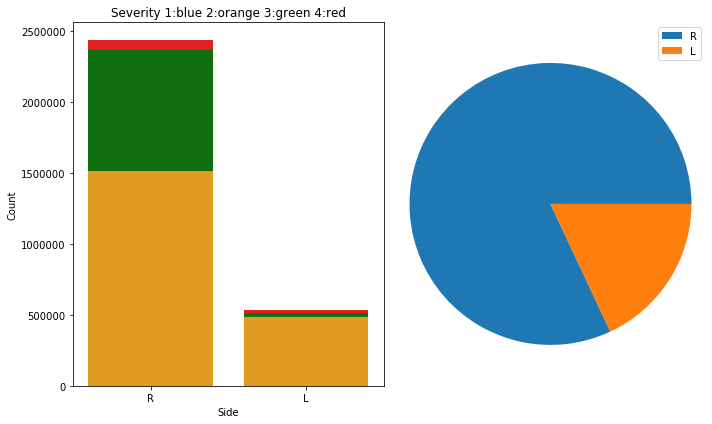

CPU times: user 3.68 s, sys: 622 ms, total: 4.3 s
Wall time: 3.72 s


In [23]:
%%time
#Computation time ~ 3.29 s
side_types=US_data["Side"].unique()
print("Unique side types in original data:",side_types)

US_data=US_data[~US_data['Side'].isin([' '])]
side_types=US_data["Side"].unique()
print("Side types in original data after removing null values:",side_types)

side_types,side_details=visualize_severity_detailed(US_data,column_name="Side")

fig=plt.figure(figsize=(10,6))
plt.subplot(121)
sns.barplot(side_types,side_details["Severity 1"],color="blue")
sns.barplot(side_types,side_details["Severity 2"],bottom=side_details["Severity 1"],color="orange")
sns.barplot(side_types,side_details["Severity 3"],bottom=side_details["Severity 2"]+side_details["Severity 1"],color="green")
sns.barplot(side_types,side_details["Severity 4"],bottom=side_details["Severity 3"]+side_details["Severity 2"]+side_details["Severity 1"],color="red")
plt.title("Severity 1:blue 2:orange 3:green 4:red")
plt.xlabel("Side")
plt.ylabel("Count")

sizes = [arg/sum(side_details["Total"]) for arg in side_details["Total"]]
plt.subplot(122)
patches, texts = plt.pie(sizes)
plt.legend(patches, side_types, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


Observation: The above plot shows the accidents on right and left sides of the lane. The total number of accidents is more on the right side as shown by the blue region in the pie chart. From the stacked bar plot, it can be observed that the number of accidents with severity levels 2 and 3 is considerable on the right side but most of the accidents on the left side are with severity level 2. Overall, the accidents with severity level 2 is more compared to other severity levels on both right and left lanes.

In [24]:
%%time
#Computational time ~ 1.42 s
#Side might affect the severity. So it will be used for the prediction of severity
#Side will be labelled to Right:1 or Left:2
side_types=US_data["Side"].unique()
labels={}
flag=1
for arg in side_types:
    labels[arg]=flag
    flag=flag+1
print(labels)

label_vals=[labels[arg] for arg in US_data["Side"]]
US_data["Side"]=label_vals


{'R': 1, 'L': 2}
CPU times: user 1.53 s, sys: 204 ms, total: 1.74 s
Wall time: 1.73 s


<a id='weather_condition'></a>
#### 2.7 Influence of weather condition on accidents

In [25]:
%%time
#Coputation time ~ 163 ms
#Filling NAN values in weather_condition by clear
US_data["Weather_Condition"]=US_data["Weather_Condition"].fillna('Clear')


CPU times: user 180 ms, sys: 2.93 ms, total: 182 ms
Wall time: 180 ms


,Severity 1,Severity 2,Severity 3,Severity 4,Total
Clear,358,576718,267595,29431,874102
Mostly Cloudy,137,272307,128741,11343,412528
Overcast,115,248636,119881,13848,382480
Fair,74,253238,72440,9537,335289
Partly Cloudy,95,199668,88409,7267,295439
...,...,...,...,...,...
Partial Fog / Windy,0,0,1,0,1
Dust Whirls,0,1,0,0,1
Snow and Thunder,0,0,1,0,1
Heavy Smoke,0,1,0,0,1


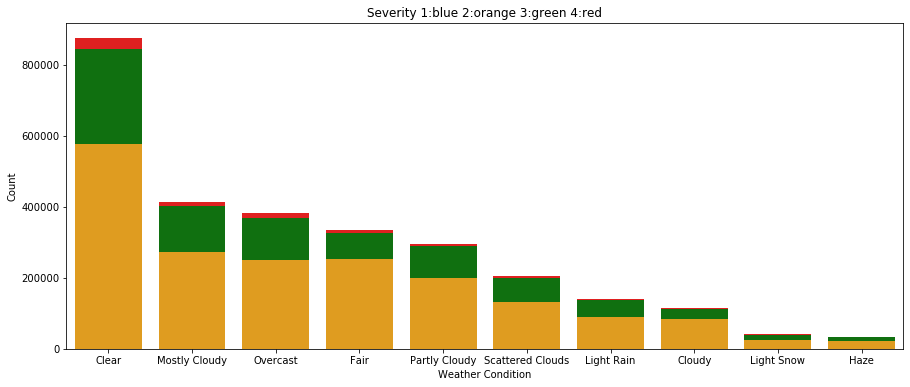

CPU times: user 24.8 s, sys: 199 ms, total: 25 s
Wall time: 25 s


In [26]:
%%time
#Coputation time ~ 24.3 s
weather_types,weather_details=visualize_severity_detailed(US_data,column_name="Weather_Condition")
ntop=10
fig=plt.figure(figsize=(15,6))
sns.barplot(weather_types[:ntop],weather_details["Severity 1"][:ntop],color="blue")
sns.barplot(weather_types[:ntop],weather_details["Severity 2"][:ntop],bottom=weather_details["Severity 1"][:ntop],color="orange")
sns.barplot(weather_types[:ntop],weather_details["Severity 3"][:ntop],bottom=weather_details["Severity 2"][:ntop]+weather_details["Severity 1"][:ntop],color="green")
sns.barplot(weather_types[:ntop],weather_details["Severity 4"][:ntop],bottom=weather_details["Severity 3"][:ntop]+weather_details["Severity 2"][:ntop]+weather_details["Severity 1"][:ntop],color="red")
plt.title("Severity 1:blue 2:orange 3:green 4:red")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

Observation: The above plot shows the number of accidents under different weather conditions. The accidents are more on a clear day, followed by mostly cloudy, overcast, and other conditions. Under all weather conditions, the number of accidents with severity level 2 is more.

In [27]:
%%time
#COmputation time ~ 1.4 s
#Labelling weather_types
labels={}
flag=1
for arg in weather_types:
    labels[arg]=flag
    flag=flag+1

label_vals=[labels[arg] for arg in US_data["Weather_Condition"]]
US_data["Weather_Condition"]=label_vals


CPU times: user 1.46 s, sys: 170 ms, total: 1.63 s
Wall time: 1.63 s


<a id='period_day'></a>
#### 2.8 Accidents at different periods of the day

Sunrise_Sunset Details


,Severity 1,Severity 2,Severity 3,Severity 4,Total
Day,720,1506087,632562,54808,2194177
Night,248,487322,255058,37529,780157


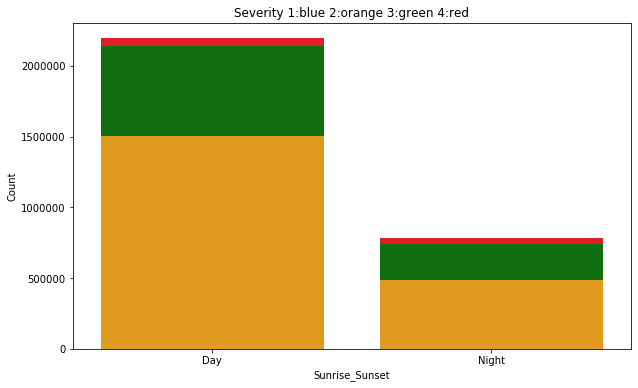

CPU times: user 2.23 s, sys: 395 ms, total: 2.63 s
Wall time: 2.62 s


In [28]:
%%time
#Computationa time ~ 12 s
print("Sunrise_Sunset Details")
ntop=US_data["Sunrise_Sunset"].nunique()
US_data["Sunrise_Sunset"]=US_data["Sunrise_Sunset"].fillna('Day')
sunrise_types,sunrise_details=visualize_severity_detailed(US_data,column_name="Sunrise_Sunset")

#COmputational time ~ 125 ms
def barplot_customized(data_types,data_details,ntop,xlabel_val):

    sns.barplot(data_types[:ntop],data_details["Severity 1"][:ntop],
                color="blue",order=data_types[:ntop])    
    sns.barplot(data_types[:ntop],data_details["Severity 2"][:ntop],
                bottom=data_details["Severity 1"][:ntop],color="orange",order=data_types[:ntop])    
    sns.barplot(data_types[:ntop],data_details["Severity 3"][:ntop],
                bottom=data_details["Severity 2"][:ntop]+data_details["Severity 1"][:ntop],color="green",order=data_types[:ntop])
    sns.barplot(data_types[:ntop],data_details["Severity 4"][:ntop],
                bottom=data_details["Severity 3"][:ntop]+data_details["Severity 2"][:ntop]+data_details["Severity 1"][:ntop],color="red",order=data_types[:ntop])
    plt.title("Severity 1:blue 2:orange 3:green 4:red")
    plt.xlabel(xlabel_val)
    plt.ylabel("Count")    
    
    
fig=plt.figure(figsize=(10,6))
ntop=len(sunrise_types)
barplot_customized(sunrise_types,sunrise_details,ntop,"Sunrise_Sunset")
plt.show()

Observations: This plot shows the total number of accidents based on day and night. The plot shows that the number of accidents is more during the day compared to night.

In [29]:
%%time
#COmputational time ~ 
labels={}
flag=1
for arg in sunrise_types:
    labels[arg]=flag
    flag=flag+1
print(labels)

label_vals=[labels[arg] for arg in US_data["Sunrise_Sunset"]]
US_data["Sunrise_Sunset"]=label_vals

#Appending "Civil_Twilight","Nautical_Twilight","Astronomical_Twilight" to remove columns
remove_columns=remove_columns_append(remove_columns,
                                     ["Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"])
US_data=fun_remove_columns(US_data,remove_columns)

{'Day': 1, 'Night': 2}
CPU times: user 1.66 s, sys: 455 ms, total: 2.11 s
Wall time: 2.11 s


<a id='location'></a>
#### 2.9 Location of accidents

In [30]:
%%time
#Computational time ~ 1.35 s
unique_types=bool_columns_details.index
unique_details={"Severity 1":[],"Severity 2":[],"Severity 3":[],
                "Severity 4":[],"Total":[],"Accidents(%)":[]}

Nd=US_data.shape[0]
for arg in unique_types:
    dum=US_data[US_data[arg]]

    unique_details["Total"].append(dum.shape[0])
    unique_details["Severity 1"].append(dum[dum["Severity"]==1].shape[0])
    unique_details["Severity 2"].append(dum[dum["Severity"]==2].shape[0])
    unique_details["Severity 3"].append(dum[dum["Severity"]==3].shape[0])
    unique_details["Severity 4"].append(dum[dum["Severity"]==4].shape[0])
    unique_details["Accidents(%)"].append(unique_details["Total"][-1]/Nd*100)

unique_details["Total"]=np.asarray(unique_details["Total"])
unique_details["Severity 1"]=np.asarray(unique_details["Severity 1"])
unique_details["Severity 2"]=np.asarray(unique_details["Severity 2"])
unique_details["Severity 3"]=np.asarray(unique_details["Severity 3"])
unique_details["Severity 4"]=np.asarray(unique_details["Severity 4"])
unique_details["Accidents(%)"]=np.asarray(unique_details["Accidents(%)"])

ind=np.argsort(unique_details['Total'])
ind=np.flip(ind)

unique_types=unique_types[list(ind)]
unique_details['Total']=unique_details['Total'][ind]
unique_details['Severity 1']=unique_details['Severity 1'][ind]
unique_details['Severity 2']=unique_details['Severity 2'][ind]
unique_details['Severity 3']=unique_details['Severity 3'][ind]
unique_details['Severity 4']=unique_details['Severity 4'][ind]    
unique_details['crash(%)']=unique_details['crash(%)'][ind]

frame=pd.DataFrame(unique_details,index=unique_types)
display(frame)

ntop=len(unique_types)
fig=plt.figure(figsize=(15,6))
barplot_customized(unique_types,unique_details,ntop,"Location")
plt.show()

KeyError: 'crash(%)'

Observation: The above bar plot shows that accidents based on location. It can be observed that accidents are most near the traffic signal followed by the junction and railway crossing. The maximum number of accidents at different locations is with severity level 2 and the percentage of accidents with severity 3 is more at junction compared to other locations.

In [31]:
%%time
#Computation time ~ 6.55 s
for clmn in bool_columns_details.index:
    label_vals=[float(arg) for arg in US_data[clmn]]
    US_data[clmn]=label_vals

remove_columns=remove_columns_append(remove_columns
                                     ,["Give_Way","No_Exit","Traffic_Calming","Bump","Roundabout","Number"])
US_data=fun_remove_columns(US_data,remove_columns)


CPU times: user 12.9 s, sys: 281 ms, total: 13.2 s
Wall time: 13.2 s


<a id='TMC'></a>
#### 2.10 Traffic Message Channel (TMC) Description for different accident

The Traffic Message Channel (TMC) Description for different accidents along with their Severity levels.

In [32]:
%%time
#COmputation time ~ 1.9 s
TMC_codes=[201,241,245,229,203]
TMC_names={"Traffic Message Channel (TMC) Description":["Accident(s)","Accident(s). Right lane blocked","(Q) accident(s). Two lanes blocked",
           "(Q) accident(s). Slow traffic","multi-vehicle accident"]}

frame=pd.DataFrame(TMC_names,TMC_codes)
display(frame)

TMC_types,TMC_details=visualize_severity_detailed(US_data,column_name="TMC")

,Traffic Message Channel (TMC) Description
201,Accident(s)
241,Accident(s). Right lane blocked
245,(Q) accident(s). Two lanes blocked
229,(Q) accident(s). Slow traffic
203,multi-vehicle accident


,Severity 1,Severity 2,Severity 3,Severity 4,Total
201.0,913,1310169,576049,2905,1890036
241.0,27,100691,117733,620,219071
245.0,3,10082,25600,234,35919
229.0,9,13621,8996,27,22653
203.0,3,7137,9567,85,16792
222.0,3,5265,7203,81,12552
244.0,2,5521,5610,30,11163
406.0,1,2029,7304,133,9467
246.0,2,1339,4922,87,6350
202.0,0,4665,1317,65,6047


CPU times: user 990 ms, sys: 395 ms, total: 1.39 s
Wall time: 1.38 s


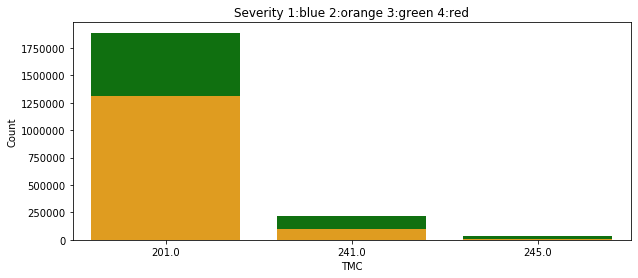

CPU times: user 270 ms, sys: 7.1 ms, total: 277 ms
Wall time: 274 ms


In [33]:
%%time
#Computational time ~ 310 ms
ntop=3
fig=plt.figure(figsize=(10,4))
barplot_customized(TMC_types,TMC_details,ntop,"TMC")
plt.show()

Observation: TMC stands for traffic message signal. For example,  code 201 is for Accident(s) and code  203 is for multi-vehicle accidents. The accidents are more with code 201.

In [34]:
%%time
#Computation time ~ 2.02 s
US_data["TMC"]=US_data["TMC"].fillna(201)

labels={}
flag=1
for arg in TMC_types:
    labels[arg]=flag
    flag=flag+1

label_vals=[labels[arg] for arg in US_data["TMC"]]
US_data["TMC"]=label_vals

CPU times: user 1.59 s, sys: 107 ms, total: 1.7 s
Wall time: 1.7 s


<a id='distance'></a>
#### 2.9 Length of the road extent affected by the accident

count    2.974334e+06
mean     2.855655e-01
std      1.548392e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e-02
80%      1.320000e-01
90%      5.920000e-01
95%      1.220000e+00
97.5%    2.350000e+00
99%      5.113000e+00
max      3.336300e+02
Name: Distance(mi), dtype: float64

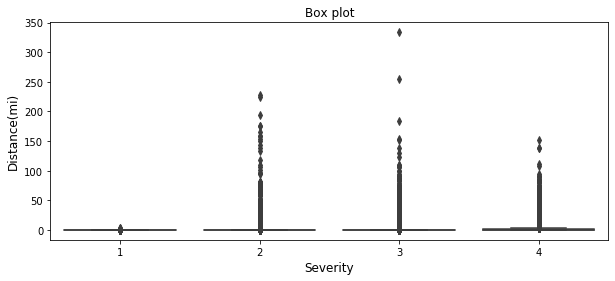

CPU times: user 2.93 s, sys: 5.02 ms, total: 2.93 s
Wall time: 2.93 s


In [35]:
%%time
# COmputation time ~ 2.8 s
desc_distance=US_data["Distance(mi)"].describe([.25,.50,.75,.80,.90,.95,0.975,0.99])
display(desc_distance)

fig=plt.figure(figsize=(10,4))
sns.boxplot(x="Severity", y="Distance(mi)", data=US_data)
plt.ylabel('Distance(mi)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.title("Box plot")
plt.show()

Observation: The above output shows the statistics and box plot of the road extent affected by accidents. It can be observed that 50% of the data is below 0 and 90% of data is 0.59 miles and there are so many outliers. So, this column is removed from further analysis.

In [36]:
remove_columns=remove_columns_append(remove_columns,["Distance(mi)"])
US_data=fun_remove_columns(US_data,remove_columns)

<a id='temperature'></a>
#### 2.11 Temperature affects on accidents

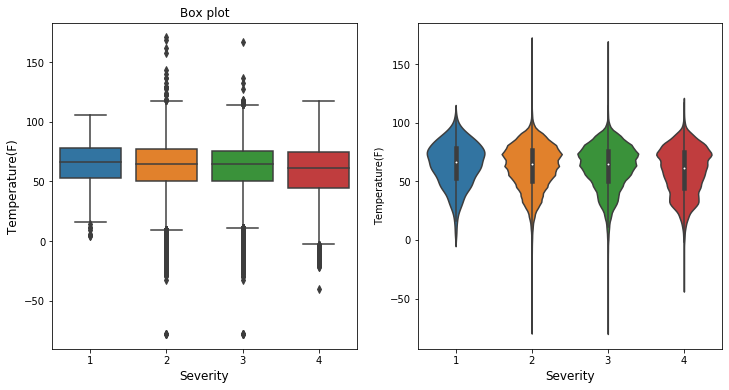

CPU times: user 13.4 s, sys: 162 ms, total: 13.6 s
Wall time: 10.2 s


In [37]:
%%time
#Computational time ~
fig=plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x="Severity", y="Temperature(F)", data=US_data)
plt.ylabel('Temperature(F)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.title("Box plot")

plt.subplot(122)
sns.violinplot(x='Severity', y='Temperature(F)', data=US_data)
plt.xlabel('Severity', fontsize=12)
plt.show()


Observation: This plot shows the temperature effects on severity.  Most of the accidents are between 10 F to 110 F and the violin plot shows that severity levels 2 and 3 have long tails because of outliers.

In [38]:
%%time
#COmputational time ~ 
remove_columns=remove_columns_append(remove_columns,["Wind_Chill(F)"])
US_data=fun_remove_columns(US_data,remove_columns)


CPU times: user 51.2 ms, sys: 73 ms, total: 124 ms
Wall time: 122 ms


<a id='humidity'></a>
#### 2.12 Humidity, Pressure, wind speed and precipivation affects on accidents

Displaying values of Humidity, Pressure, Wind Speed, and Precipitation. From the display, it is clear that pressure and precipitation have almost zero values. Hence assigning them to remove columns.

In [39]:
%%time
#COmputationa time ~ 
display(US_data[["Humidity(%)","Pressure(in)","Wind_Speed(mph)","Precipitation(in)"]].describe())

,Humidity(%),Pressure(in),Wind_Speed(mph),Precipitation(in)
count,2.915161e+06,2.926192e+06,2.533494e+06,975977.000000
mean,6.540542e+01,2.983189e+01,8.298063e+00,0.020495
std,2.255677e+01,7.213810e-01,5.138547e+00,0.235770
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.900000e+01,2.982000e+01,4.600000e+00,0.000000
50%,6.700000e+01,2.998000e+01,7.000000e+00,0.000000
75%,8.400000e+01,3.011000e+01,1.040000e+01,0.000000
max,1.000000e+02,3.304000e+01,8.228000e+02,25.000000


CPU times: user 509 ms, sys: 116 ms, total: 626 ms
Wall time: 626 ms


In [16]:
7.213810e-01

0.721381

Observation: The above output shows the statistics of humidity, pressure, wind speed, and precipitation. It is observed that 75% of the accidents have precipitation below 0.0 and occur around the pressure of 29.8 inches. Based on the statistics, only humidity and windspeed are visualized and used for further analysis.

In [40]:
%%time
#COmputational time ~ 
remove_columns=remove_columns_append(remove_columns,["Pressure(in)","Precipitation(in)"])
US_data=fun_remove_columns(US_data,remove_columns)


CPU times: user 97.5 ms, sys: 135 ms, total: 233 ms
Wall time: 230 ms


count    2.915161e+06
mean     6.540542e+01
std      2.255677e+01
min      1.000000e+00
25%      4.900000e+01
50%      6.700000e+01
75%      8.400000e+01
80%      8.700000e+01
90%      9.300000e+01
95%      9.700000e+01
97.5%    1.000000e+02
99%      1.000000e+02
max      1.000000e+02
Name: Humidity(%), dtype: float64

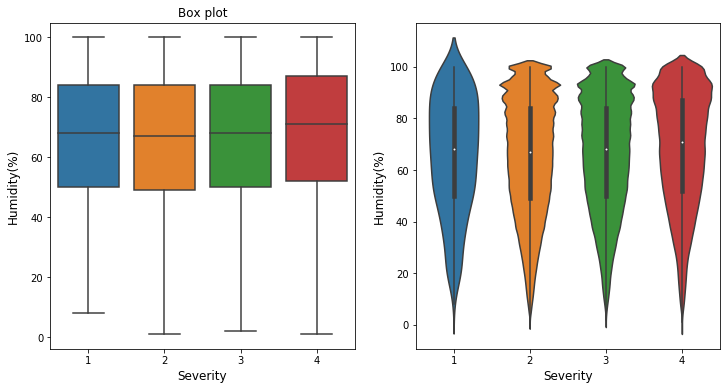

CPU times: user 14.2 s, sys: 178 ms, total: 14.3 s
Wall time: 10.7 s


In [41]:
%%time
#Computational time ~
#Plotting humidity
display(US_data["Humidity(%)"].describe([.25,.50,.75,.80,.90,.95,0.975,0.99]))

fig=plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x="Severity", y="Humidity(%)", data=US_data)
plt.ylabel('Humidity(%)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.title("Box plot")

plt.subplot(122)
sns.violinplot(x='Severity', y='Humidity(%)', data=US_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Humidity(%)', fontsize=12)
plt.show()

Observation: This plot shows the box plot and leaf plot of humidity at different severity levels. There are no outliers in the humidity data. 

count    2.533494e+06
mean     8.298063e+00
std      5.138547e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
80%      1.200000e+01
90%      1.500000e+01
95%      1.730000e+01
97.5%    1.960000e+01
99%      2.300000e+01
max      8.228000e+02
Name: Wind_Speed(mph), dtype: float64

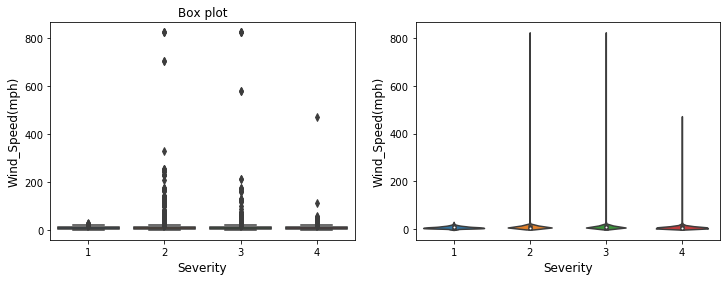

CPU times: user 11.9 s, sys: 166 ms, total: 12 s
Wall time: 8.48 s


In [42]:
%%time
#Computational time ~ 22 s
desc=US_data["Wind_Speed(mph)"].describe(percentiles=[.25,.50,.75,.80,.90,.95,0.975,0.99])
display(desc)

fig=plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(x="Severity", y="Wind_Speed(mph)", data=US_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Speed(mph)', fontsize=12)
plt.title("Box plot")

plt.subplot(122)
sns.violinplot(x='Severity', y='Wind_Speed(mph)', data=US_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Speed(mph)', fontsize=12)
plt.show()


Observation: Statistics of wind speed show that 99% of values lie below 23 miles per hour and the maximum value is 828 miles per hour. It says that rest 1% of the data is varying a lot ranging from 23 to 822 and hence there are outliers in the box plot.

In [43]:
%%time
#Computational time ~
US_data.loc[US_data["Wind_Speed(mph)"]>desc["99%"], 'Wind_Speed(mph)']=np.nan

CPU times: user 24.4 ms, sys: 17 µs, total: 24.4 ms
Wall time: 22.8 ms


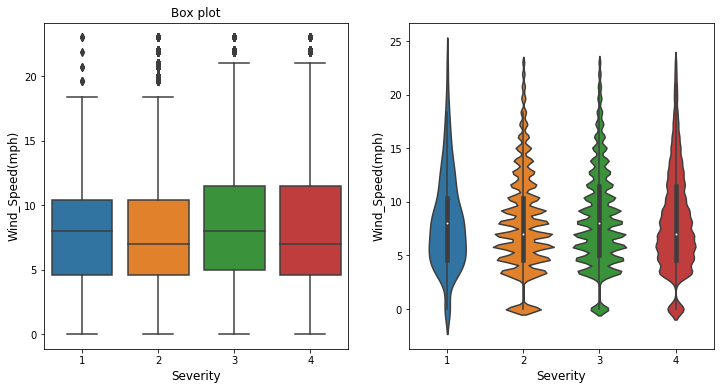

CPU times: user 12.6 s, sys: 143 ms, total: 12.7 s
Wall time: 9.27 s


In [44]:
%%time
#Computational time ~ 

fig=plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x="Severity", y="Wind_Speed(mph)", data=US_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Speed(mph)', fontsize=12)
plt.title("Box plot")

plt.subplot(122)
sns.violinplot(x='Severity', y='Wind_Speed(mph)', data=US_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Speed(mph)', fontsize=12)
plt.show()

This plot shows the box and violin plot of wind speed after removing the data above 23 miles per hour. It can be observed that there are a few numbers of outliers.

<a id='visibility'></a>
#### 2.13 Affect of visibility on accidents

count    2.908643e+06
mean     9.150770e+00
std      2.892114e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
80%      1.000000e+01
90%      1.000000e+01
95%      1.000000e+01
97.5%    1.000000e+01
99%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64

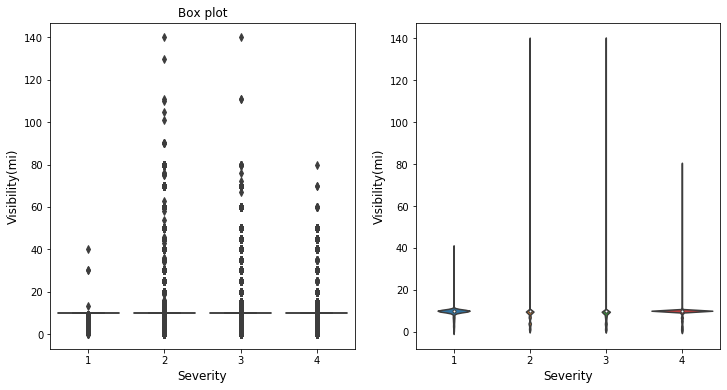

CPU times: user 14.7 s, sys: 176 ms, total: 14.9 s
Wall time: 11.5 s


In [45]:
%%time
display(US_data["Visibility(mi)"].describe([.25,.50,.75,.80,.90,.95,0.975,0.99]))

fig=plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x="Severity", y="Visibility(mi)", data=US_data)
plt.ylabel('Visibility(mi)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.title("Box plot")

plt.subplot(122)
sns.violinplot(x='Severity', y='Visibility(mi)', data=US_data)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Visibility(mi)', fontsize=12)
plt.show()

Observation: Statistics of visibility show that most of the values of visibility are around 10 miles and there are a lot of outliers as shown in the box plot. So the visibility is removed from further analysis.

In [46]:
%%time
remove_columns=remove_columns_append(remove_columns,["Visibility(mi)"])
US_data=fun_remove_columns(US_data,remove_columns)

CPU times: user 42.1 ms, sys: 58 ms, total: 100 ms
Wall time: 99.2 ms


<a id='year'></a>
#### 2.14 Accidents by year

,Severity 1,Severity 2,Severity 3,Severity 4,Total
2015,0,0,0,1,1
2016,225,269846,126178,14350,410599
2017,282,461971,231081,24149,717483
2018,259,574016,292570,25770,892615
2019,202,687573,237790,28065,953630
2020,0,3,1,2,6


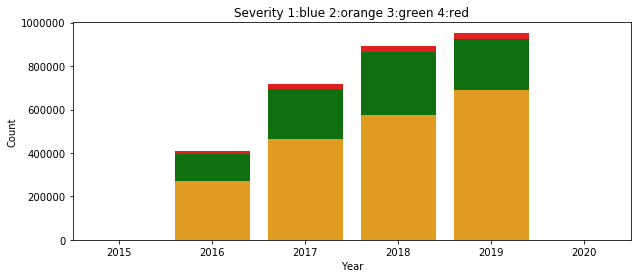

CPU times: user 920 ms, sys: 107 ms, total: 1.03 s
Wall time: 1.02 s


In [47]:
%%time
#Computational time ~ 
year_types,year_details=visualize_severity_detailed(US_data,column_name="Year",decending_order=False)

ntop=len(year_types)
fig=plt.figure(figsize=(10,4))
barplot_customized(year_types,year_details,ntop,"Year")
plt.show()

Observation: The above plot shows the number of accidents by year. The number of accidents is increasing by the year and there is not enough data for 2020 and I would guess the accidents may decreases by the end of 2020 because of current lockdown.

<a id='month'></a>
#### 2.15 Accidents in different months

The total number of accidents reported by month have calculated along with the Severity levels.

,Severity 1,Severity 2,Severity 3,Severity 4,Total
1,56,135962,66865,7089,209972
2,79,129973,62043,6554,198649
3,64,135713,64618,7032,207427
4,58,139305,65642,6758,211763
5,71,137597,64016,7376,209060
6,90,132654,69845,7436,210025
7,79,144107,70772,8001,222959
8,105,193418,87390,7998,288911
9,97,201901,82684,7748,292430
10,91,229577,86064,8793,324525


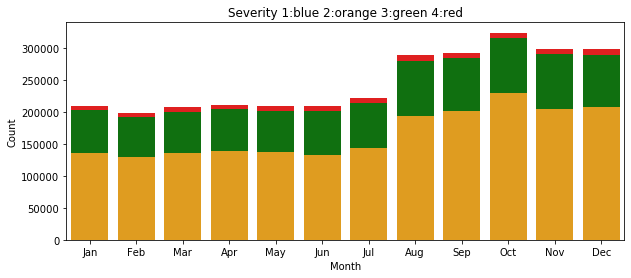

CPU times: user 1.29 s, sys: 49 ms, total: 1.33 s
Wall time: 1.33 s


In [48]:
%%time
#COmputational time ~
#Removing Year
remove_columns=remove_columns_append(remove_columns,["Year"])
US_data=fun_remove_columns(US_data,remove_columns)

month_types,month_details=visualize_severity_detailed(US_data,column_name="Month",decending_order=False)
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ntop=len(month_names)
fig=plt.figure(figsize=(10,4))
barplot_customized(month_names,month_details,ntop,"Month")
plt.show()

Observation: This shows the bar plot of accidents by month. The number of accidents is mostly uniform until July then increases from august.

<a id='day'></a>
#### 2.16 Accidents variation on daily basis

,Severity 1,Severity 2,Severity 3,Severity 4,Total
1,0,1136,958,135,2229
2,2,4141,1982,200,6325
3,1,5532,2557,254,8344
4,1,5097,2462,250,7810
5,2,4284,2207,237,6730
...,...,...,...,...,...
361,5,6869,2805,346,10025
362,0,6258,2886,276,9420
363,2,4457,2499,247,7205
364,0,4695,2060,274,7029


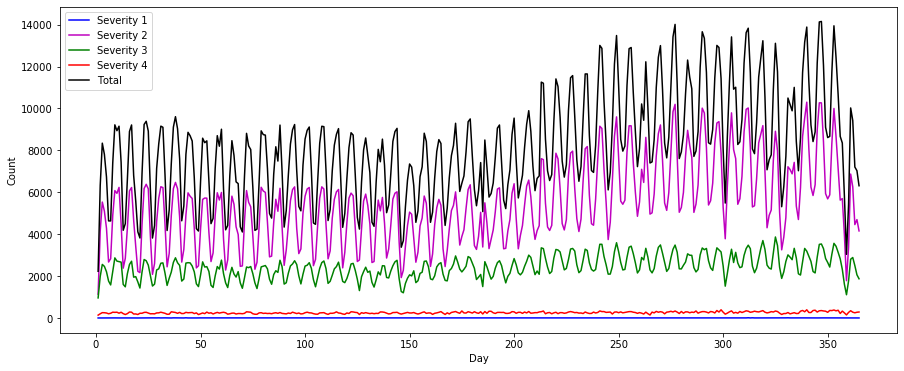

CPU times: user 3.62 s, sys: 9.96 ms, total: 3.63 s
Wall time: 3.63 s


In [49]:
%%time
day_types,day_details=visualize_severity_detailed(US_data,column_name="Day",decending_order=False)

fig=plt.figure(figsize=(15,6))
plt.plot(day_types,day_details["Severity 1"],color='b')
plt.plot(day_types,day_details["Severity 2"],color='m')
plt.plot(day_types,day_details["Severity 3"],color='g')
plt.plot(day_types,day_details["Severity 4"],color='r')
plt.plot(day_types,day_details["Total"],color='k')
plt.xlabel("Day")
plt.ylabel("Count")
plt.legend(["Severity 1","Severity 2","Severity 3","Severity 4","Total"])
plt.show()

Observation: The above plot shows the daily variation of the total number of accidents and the total number of accidents with different severity levels. In this plot, day number 1 corresponds to Jan 1st and day number 365 corresponds to December 31st. The plot shows the number of accidents is oscillating and the maximum value of oscillations is increasing towards the end of the year. The troughs in the oscillation correspond to the weekends because the accidents are decreasing on the weekends and there are approximately 53 troughs.

<a id='weekday'></a>
#### 2.17 Accidents on different days of a weel

Accidents reported on different days.

,Severity 1,Severity 2,Severity 3,Severity 4,Total
0,190,352093,140436,14536,507255
1,153,378499,150179,14894,543725
2,169,374204,148761,14340,537474
3,152,362216,149546,14224,526138
4,183,366647,156042,14876,537748
5,62,84691,75630,9966,170349
6,59,75059,67026,9501,151645


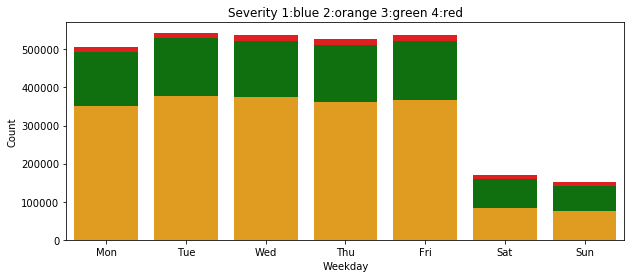

CPU times: user 1.02 s, sys: 48 ms, total: 1.06 s
Wall time: 1.06 s


In [50]:
%%time
#COmputational time ~ 
week_types,week_details=visualize_severity_detailed(US_data,column_name="Weekday",decending_order=False)
week_names=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ntop=len(week_types)
fig=plt.figure(figsize=(10,4))
barplot_customized(week_names,week_details,ntop,"Weekday")
plt.show()

Observation: This plot shows the variation in the number of accidents with a weekday. This plot supports the previous argument that the number of accidents is decreasing on weekends.

<a id='hour'></a>
#### 2.18 Accidents by hourly basis

,Severity 1,Severity 2,Severity 3,Severity 4,Total
0,4,11853,7923,3409,23189
1,2,9311,6532,2155,18000
2,1,9458,7209,2276,18944
3,4,9057,7149,2390,18600
4,11,32679,18088,2816,53594
5,20,53434,26672,3740,83866
6,48,114170,50608,4253,169079
7,102,196978,71776,4650,273506
8,104,207297,72201,4672,284274
9,54,124445,48526,4443,177468


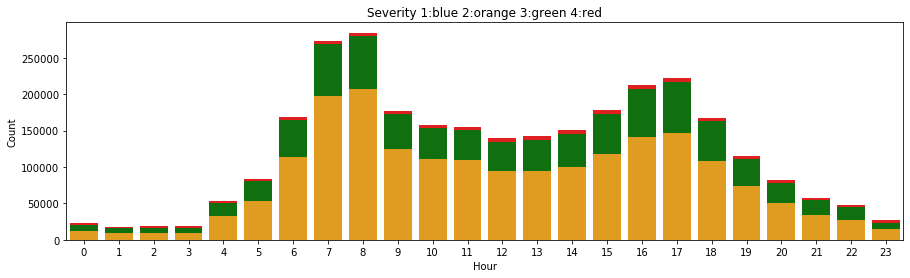

CPU times: user 2.03 s, sys: 9.81 ms, total: 2.04 s
Wall time: 2.04 s


In [51]:
%%time
#COmputational time ~ 
hour_types,hour_details=visualize_severity_detailed(US_data,column_name="Hour",decending_order=False)

ntop=len(hour_types)
fig=plt.figure(figsize=(15,4))
barplot_customized(hour_types,hour_details,ntop,"Hour")
plt.show()

Observation: The above plot shows the number of accidents at different hours of the day. The number of accidents peaks at 8:00 AM and 5:00 PM because these are peak traffic periods as many people travel to offices and back to home.

,Severity 1,Severity 2,Severity 3,Severity 4,Total
0.0,0,215,156,82,453
1.0,0,213,120,53,386
2.0,1,196,121,55,373
3.0,0,184,100,40,324
4.0,0,195,128,54,377
...,...,...,...,...,...
1435.0,0,201,180,51,432
1436.0,0,243,151,53,447
1437.0,1,256,157,48,462
1438.0,0,236,161,37,434


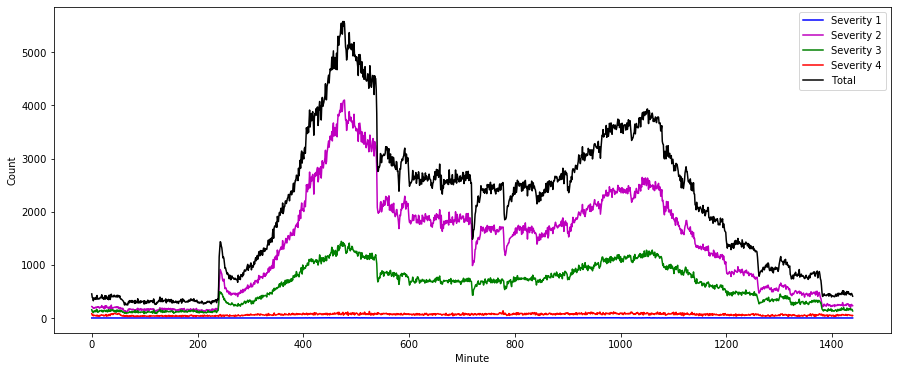

CPU times: user 13.4 s, sys: 7.78 ms, total: 13.4 s
Wall time: 13.4 s


In [52]:
%%time
#COmputational time ~ 

#Plotting minutes
minute_types,minute_details=visualize_severity_detailed(US_data,column_name="Minute",decending_order=False)

fig=plt.figure(figsize=(15,6))
plt.plot(minute_types,minute_details["Severity 1"],color='b')
plt.plot(minute_types,minute_details["Severity 2"],color='m')
plt.plot(minute_types,minute_details["Severity 3"],color='g')
plt.plot(minute_types,minute_details["Severity 4"],color='r')
plt.plot(minute_types,minute_details["Total"],color='k')

plt.xlabel("Minute")
plt.ylabel("Count")
plt.legend(["Severity 1","Severity 2","Severity 3","Severity 4","Total"])
plt.show()

Observation: This plot shows the variation of the number of accidents at a different minute of a day starting from 0 minutes, which corresponds to 12:00 AM. The minute plot is similar to the hourly plot where the curve peaks at 8:AM and 5:PM.

<a id='duration'></a>
#### 2.19 Duration of traffic congestion

In [53]:
%%time
desc=US_data["Duration"].describe([.25,.50,.75,.80,.90,.95,0.975,0.99])

print(desc)

count    2.974334e+06
mean     1.210181e+02
std      3.678431e+03
min     -3.408333e+01
25%      2.971667e+01
50%      4.458333e+01
75%      7.470000e+01
80%      9.326667e+01
90%      3.600000e+02
95%      3.600000e+02
97.5%    3.600000e+02
99%      3.600000e+02
max      1.786320e+06
Name: Duration, dtype: float64
CPU times: user 105 ms, sys: 1.03 ms, total: 106 ms
Wall time: 104 ms


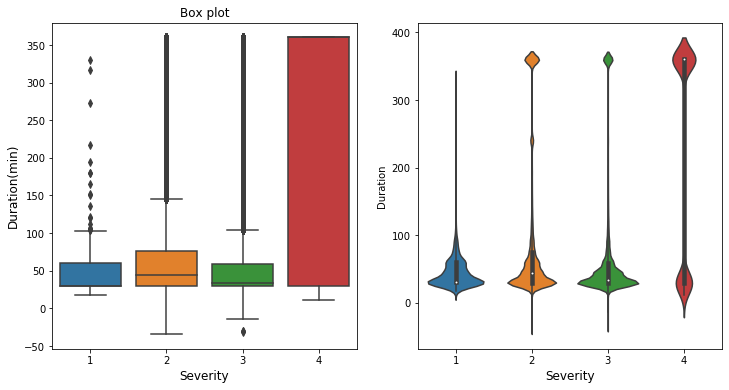

CPU times: user 16.1 s, sys: 374 ms, total: 16.5 s
Wall time: 12.8 s


In [54]:
%%time
nmeans=4
fig=plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x="Severity",y="Duration",data=US_data[US_data["Duration"]<=desc["99%"]])
plt.ylabel('Duration(min)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.title("Box plot")

plt.subplot(122)
sns.violinplot(x="Severity",y="Duration",data=US_data[US_data["Duration"]<=desc["99%"]])
plt.xlabel('Severity', fontsize=12)
plt.show()

Observation: This above output shows the box and violin plot of traffic congestion. The plot shows there is a clear effect of traffic congestion on the severity.

In [55]:
%%time

US_data.loc[US_data["Duration"]>desc["99%"], 'Duration']=np.nan
US_data.loc[US_data["Duration"]<0, 'Duration']=np.nan

#Appending Year to remove columns
remove_columns=remove_columns_append(remove_columns,["Month","Year"])
US_data=fun_remove_columns(US_data,remove_columns)

num_cols=US_data.select_dtypes(include=['float64', 'int64']).columns.values 
US_data[num_cols]=US_data[num_cols].fillna(US_data.median())

print("Removing columns:",remove_columns)
US_data=fun_remove_columns(US_data,remove_columns)
print("US_data details after removing above columns")
remove_columns,replace_columns,data_details=summary_fun(US_data)
display_pandas_data(data_details)

Removing columns: ['Start_Time', 'End_Time', 'Zipcode', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Source', 'Timezone', 'County', 'Street', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Give_Way', 'No_Exit', 'Traffic_Calming', 'Bump', 'Roundabout', 'Number', 'Distance(mi)', 'Wind_Chill(F)', 'Pressure(in)', 'Precipitation(in)', 'Visibility(mi)', 'Year', 'Month', 'Year']
US_data details after removing above columns


,Data Type,Unique count,NAN Count,Percent(NAN),Action
TMC,int64,21,0,0.000000,None
Severity,int64,4,0,0.000000,None
Start_Lat,float64,1002359,0,0.000000,None
Start_Lng,float64,985098,0,0.000000,None
Side,int64,2,0,0.000000,None
City,object,11685,83,0.002791,ReplaceNANs
State,object,49,0,0.000000,None
Temperature(F),float64,827,0,0.000000,None
Humidity(%),float64,100,0,0.000000,None
Wind_Speed(mph),float64,39,0,0.000000,None


CPU times: user 11.1 s, sys: 3.34 s, total: 14.4 s
Wall time: 14.4 s


This frame shows the summary of the data after cleaning.

<a id='ML'></a>
#### 3.0 Machine learning model to predict severity in bay area

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Observation: The accident dataset is around 3 million and the computational power of my laptop is not enough to build a model on large data. From Exploratory Data Analysis (EDA), the state of California has more accidents compared to other states and the San Francisco bay area has around one-fifth of accidents. Machine learning models are built for the California bay area.

Severity in california bay area


,1,2,3,4
Severity,72,90870,45704,1002


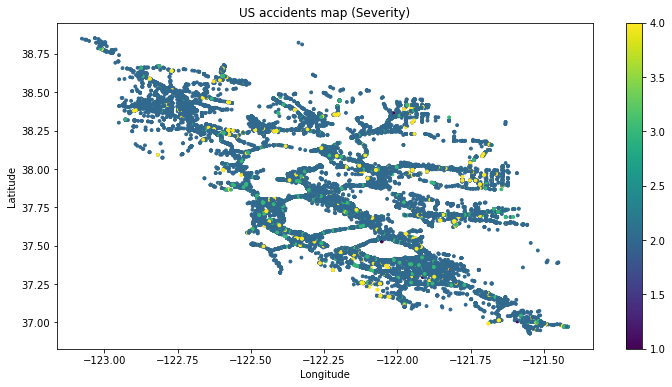

CPU times: user 5.27 s, sys: 65 ms, total: 5.33 s
Wall time: 4.73 s


In [61]:
%%time
#Computational time ~ 5.28 s
req_data=US_data[US_data["State"]=="CA"]

# display(req_data)
dum=req_data["City"].value_counts().sort_values(ascending=False)

req_cities=['San Francisco']

req_cities=['Alameda','Albany','American','Antioch','Atherton','Belmont','San Mateo',
            'Belvedere','Benicia','Berkeley','Brentwood','Brisbane','Burlingame',
            'Calistoga','Campbell','Clayton','Cloverdale','Colma','Concord',
            'Corte Madera','Cotati','Cupertino','Daly City','Danville','Dixon	City',
            'Dublin','East Palo Alto','El Cerrito','Emeryville','Fairfax','Fairfield',
            'Foster City','Fremont','Gilroy','Half Moon Bay','Hayward','Healdsburg',
            'Hercules','Hillsborough','Lafayette','Larkspur','Livermore','Los Altos',
            'Los Altos Hills','Los Gatos','Martinez','Menlo Park','Mill Valley',
            'Millbrae','Milpitas','Monte Sereno','Moraga','Morgan Hill','Mountain View',
            'Napa','Newark','Novato','Oakland','Oakley','Orinda','Pacifica','Palo Alto',
            'Petaluma','Piedmont','Pinole','Pittsburg','Pleasant Hill','Pleasanton',
            'Portola Valley','Redwood','Richmond','Rio Vista','Rohnert Park','Ross',
            'St. Helena','San Anselmo','San Bruno','San Carlos','San Francisco',
            'San Jose','San Leandro','San Mateo','San Pablo','San Rafael','San Ramon',
            'Santa Clara','Santa Rosa','Saratoga','Sausalito','Sebastopol','Sonoma',
            'South San Francisco','Suisun City','Sunnyvale','Tiburon','Union City',
            'Vacaville','Vallejo','Walnut Creek','Windsor','Woodside','Yountville']

req_data2=req_data.loc[req_data["City"].isin(req_cities)]

severity_count={}
severity_count[1]=req_data2[req_data2["Severity"]==1].shape[0]
severity_count[2]=req_data2[req_data2["Severity"]==2].shape[0]
severity_count[3]=req_data2[req_data2["Severity"]==3].shape[0]
severity_count[4]=req_data2[req_data2["Severity"]==4].shape[0]

frame=pd.DataFrame(severity_count,index=["Severity"])
print("Severity in california bay area")
display(frame)

plt.figure(figsize=(12, 6))
plt.scatter(req_data2["Start_Lng"],req_data2["Start_Lat"],s=8,c=req_data2["Severity"])
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("US accidents map (Severity)")
plt.show()



Severity in california bay area


,1,2,3,4
Severity,366,660407,290656,9836


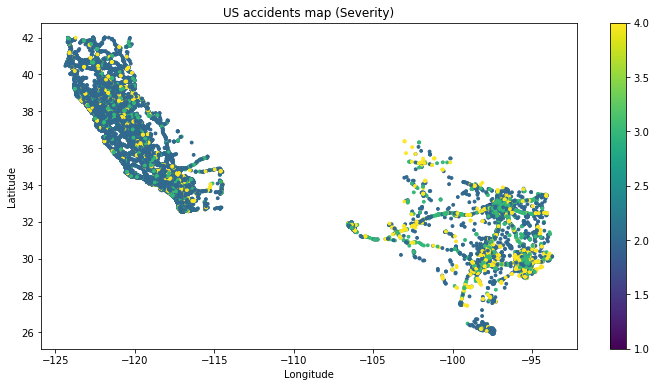

CPU times: user 29.1 s, sys: 62.5 ms, total: 29.1 s
Wall time: 28.8 s


In [226]:
%%time
#Computational time ~ 5.28 s
req_data2s=US_data[(US_data["State"]=="CA")|(US_data["State"]=="TX")]

# display(req_data)
dum=req_data["City"].value_counts().sort_values(ascending=False)

req_cities=['San Francisco']

req_cities=['Alameda','Albany','American','Antioch','Atherton','Belmont','San Mateo',
            'Belvedere','Benicia','Berkeley','Brentwood','Brisbane','Burlingame',
            'Calistoga','Campbell','Clayton','Cloverdale','Colma','Concord',
            'Corte Madera','Cotati','Cupertino','Daly City','Danville','Dixon	City',
            'Dublin','East Palo Alto','El Cerrito','Emeryville','Fairfax','Fairfield',
            'Foster City','Fremont','Gilroy','Half Moon Bay','Hayward','Healdsburg',
            'Hercules','Hillsborough','Lafayette','Larkspur','Livermore','Los Altos',
            'Los Altos Hills','Los Gatos','Martinez','Menlo Park','Mill Valley',
            'Millbrae','Milpitas','Monte Sereno','Moraga','Morgan Hill','Mountain View',
            'Napa','Newark','Novato','Oakland','Oakley','Orinda','Pacifica','Palo Alto',
            'Petaluma','Piedmont','Pinole','Pittsburg','Pleasant Hill','Pleasanton',
            'Portola Valley','Redwood','Richmond','Rio Vista','Rohnert Park','Ross',
            'St. Helena','San Anselmo','San Bruno','San Carlos','San Francisco',
            'San Jose','San Leandro','San Mateo','San Pablo','San Rafael','San Ramon',
            'Santa Clara','Santa Rosa','Saratoga','Sausalito','Sebastopol','Sonoma',
            'South San Francisco','Suisun City','Sunnyvale','Tiburon','Union City',
            'Vacaville','Vallejo','Walnut Creek','Windsor','Woodside','Yountville']

# req_data2=req_data.loc[req_data["City"].isin(req_cities)]

severity_count={}
severity_count[1]=req_data2s[req_data2s["Severity"]==1].shape[0]
severity_count[2]=req_data2s[req_data2s["Severity"]==2].shape[0]
severity_count[3]=req_data2s[req_data2s["Severity"]==3].shape[0]
severity_count[4]=req_data2s[req_data2s["Severity"]==4].shape[0]

frame=pd.DataFrame(severity_count,index=["Severity"])
print("Severity in california bay area")
display(frame)

plt.figure(figsize=(12, 6))
plt.scatter(req_data2s["Start_Lng"],req_data2s["Start_Lat"],s=8,c=req_data2s["Severity"])
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("US accidents map (Severity)")
plt.show()



This scatter plot shows the accidents map in california area.

<a id='CA'></a>
#### 3.1 Correlation analysis

CPU times: user 1.1 s, sys: 43.6 ms, total: 1.15 s
Wall time: 559 ms


[]

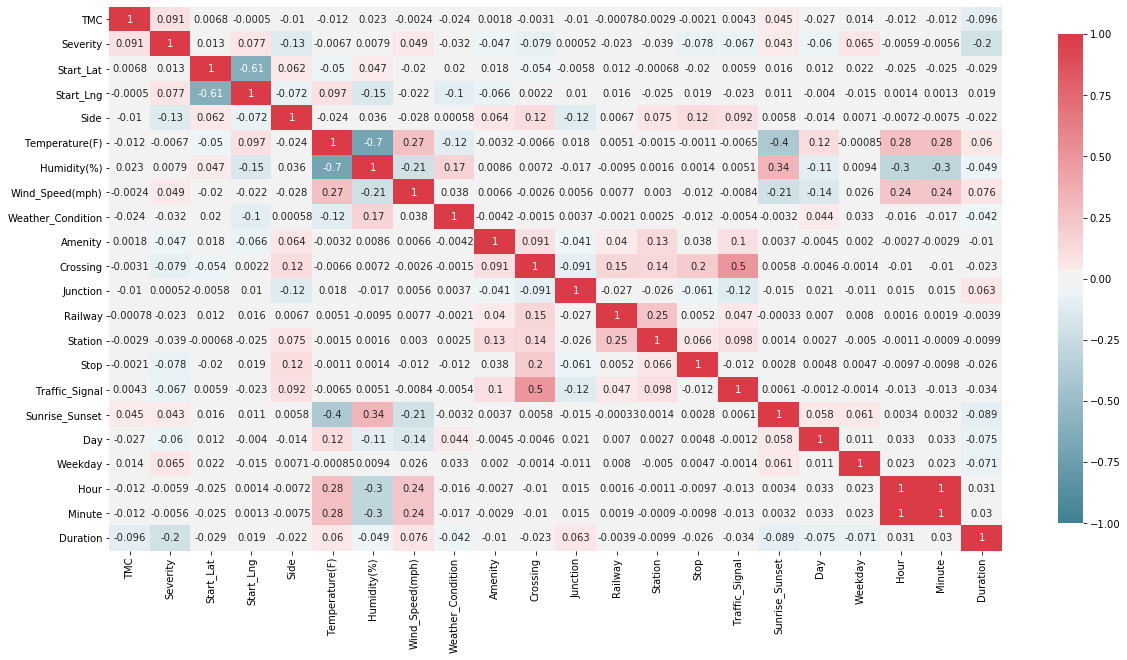

In [104]:
%%time
#COmputational time ~
corr=req_data2.corr()

f, ax = plt.subplots(figsize=(20, 10))
g=sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=False, ax=ax, annot=True, vmax=1.0, vmin=-1.0, cbar_kws={"shrink": 0.9})
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.plot()

Severity doesnot show strong correlation with any of the feature and hence all the features are used for machine learning model.

<a id='TTsplit'></a>
#### 3.2 Train Test split

In [96]:
# resampling: under sampling and oversampling
def resample(dat, col, n1,n2,n3):
    return pd.concat([dat[dat[col]==1].sample(n1, replace = True),
                   dat[dat[col]==2].sample(n2),
                   dat[dat[col]==3].sample(n2),
                   dat[dat[col]==4].sample(n3, replace = True)  ], axis=0)

req_data_samples = resample(req_data2, 'Severity', 500,10500,2000)
print('resampled data:', req_data_samples.Severity.value_counts())
display(req_data2)

resampled data: 3    10500
2    10500
4     2000
1      500
Name: Severity, dtype: int64


,TMC,Severity,Start_Lat,Start_Lng,Side,City,State,Temperature(F),Humidity(%),Wind_Speed(mph),...,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Day,Weekday,Hour,Minute,Duration
728,1,3,38.085300,-122.233017,1,Vallejo,CA,75.0,48.0,5.8,...,0.0,0.0,0.0,0.0,1,172,1,10,634.0,30.000000
729,1,3,37.631813,-122.084167,1,Hayward,CA,75.0,48.0,4.6,...,0.0,0.0,0.0,0.0,1,172,1,10,630.0,46.383333
730,1,2,37.896564,-122.070717,1,Walnut Creek,CA,82.9,31.0,4.6,...,0.0,0.0,0.0,0.0,1,172,1,10,649.0,30.000000
731,1,3,37.334255,-122.032471,1,Cupertino,CA,75.9,48.0,4.6,...,0.0,0.0,0.0,0.0,1,172,1,10,641.0,30.000000
732,1,2,37.250729,-121.910713,1,San Jose,CA,75.2,41.0,5.8,...,0.0,0.0,0.0,0.0,1,172,1,10,616.0,47.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974286,1,2,37.733491,-122.412121,1,San Francisco,CA,74.0,64.0,7.0,...,0.0,0.0,0.0,0.0,1,235,4,12,766.0,29.083333
2974287,1,2,37.339060,-121.851280,1,San Jose,CA,84.0,45.0,7.0,...,0.0,0.0,0.0,0.0,1,235,4,13,796.0,29.683333
2974290,1,3,37.378708,-121.952142,1,Santa Clara,CA,82.0,52.0,9.0,...,0.0,0.0,0.0,0.0,1,235,4,16,970.0,28.750000
2974291,1,3,37.609816,-122.493720,1,Pacifica,CA,78.0,54.0,7.0,...,0.0,0.0,0.0,0.0,1,235,4,16,979.0,28.716667


In [97]:
%%time
#Computational time ~
#selecting input columns and output columns for training

x_clmns=list(US_data.columns)
# print("x_clmns:",x_clmns)
x_clmns.remove("Severity")
x_clmns.remove("City")
x_clmns.remove("State")
y_clmns=["Severity"]

X=req_data_samples[x_clmns].values
y=req_data_samples[y_clmns].values

y=np.reshape(y,(-1,1))
y=y[:,]

# Split the data set into training and testing data sets
X_train, X_test_, y_train, y_test_ = train_test_split(X,y[:,0], train_size=13000,test_size=0.1,random_state=21)
# print("X.rows",len(X))
# X_train, X_test, y_train, y_test = train_test_split(X,y[:,0], train_size=13000,test_size=0.1,random_state=21)

print("Train size:",X_train.shape[0])
print("Test size:",X_test.shape[0])

severity_count_y_test={}
severity_count_y_test[1]=y_test[y_test==1].shape[0]
severity_count_y_test[2]=y_test[y_test==2].shape[0]
severity_count_y_test[3]=y_test[y_test==3].shape[0]
severity_count_y_test[4]=y_test[y_test==4].shape[0]

severity_count_y_train={}
severity_count_y_train[1]=y_train[y_train==1].shape[0]
severity_count_y_train[2]=y_train[y_train==2].shape[0]
severity_count_y_train[3]=y_train[y_train==3].shape[0]
severity_count_y_train[4]=y_train[y_train==4].shape[0]

frame_train=pd.DataFrame(severity_count_y_train,index=["Severity count in train_data"])
frame=pd.DataFrame(severity_count_y_test,index=["Severity count in test_data"])
display(frame)
display(frame_train)

Train size: 13000
Test size: 13765


,1,2,3,4
Severity count in test_data,9,9021,4620,115


,1,2,3,4
Severity count in train_data,284,5836,5788,1092


CPU times: user 24.9 ms, sys: 3 ms, total: 27.9 ms
Wall time: 26.1 ms


In [73]:
%%time
#Computational time ~
#selecting input columns and output columns for training

x_clmns=list(US_data.columns)
# print("x_clmns:",x_clmns)
x_clmns.remove("Severity")
x_clmns.remove("City")
x_clmns.remove("State")
y_clmns=["Severity"]

X=req_data2[x_clmns].values
y=req_data2[y_clmns].values

y=np.reshape(y,(-1,1))
y=y[:,]

# Split the data set into training and testing data sets
X_train_, X_test, y_train_, y_test = train_test_split(X,y[:,0], test_size=0.1,random_state=21)
# X_train, X_test, y_train, y_test = train_test_split(X,y[:,0], train_size = 13000, test_size=0.1,random_state=21)

print("Train size:",X_train.shape[0])
print("Test size:",X_test.shape[0])

severity_count_y_test={}
severity_count_y_test[1]=y_test[y_test==1].shape[0]
severity_count_y_test[2]=y_test[y_test==2].shape[0]
severity_count_y_test[3]=y_test[y_test==3].shape[0]
severity_count_y_test[4]=y_test[y_test==4].shape[0]

severity_count_y_train={}
severity_count_y_train[1]=y_train[y_train==1].shape[0]
severity_count_y_train[2]=y_train[y_train==2].shape[0]
severity_count_y_train[3]=y_train[y_train==3].shape[0]
severity_count_y_train[4]=y_train[y_train==4].shape[0]

frame_train=pd.DataFrame(severity_count_y_train,index=["Severity count in train_data"])
frame=pd.DataFrame(severity_count_y_test,index=["Severity count in test_data"])
display(frame)
display(frame_train)

Train size: 13000
Test size: 13765


,1,2,3,4
Severity count in test_data,9,9021,4620,115


,1,2,3,4
Severity count in train_data,3254,3283,3229,3234


CPU times: user 65.8 ms, sys: 690 µs, total: 66.5 ms
Wall time: 65.3 ms


Splitting the data using train_test split. Training number of points are around 123 thousand and test size is around 13 thousand.

<a id='LR'></a>
#### 3.3 Logistic regression

Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Accuracy of train data: 0.5813076923076923
Accuracy of test data: 0.5992008717762441


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


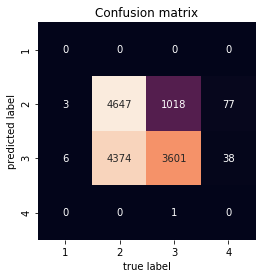

,1,2,3,4
Severity.count in test_data,9,9021,4620,115


CPU times: user 13.7 s, sys: 29.7 ms, total: 13.8 s
Wall time: 13.2 s


In [98]:
%%time
#COmputationa time ~ 2 min 47 seconds
lr = LogisticRegression(random_state=0,solver='saga',max_iter=1000)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_train)
acc_train_lr=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_lr)

y_pred=lr.predict(X_test)
acc_test_lr=accuracy_score(y_test, y_pred)
print("Accuracy of test data:",acc_test_lr)

mat_lr = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Confusion matrix")
plt.show()

frame=pd.DataFrame(severity_count_y_test,index=["Severity.count in test_data"])
display(frame)


Logistic regression is returning very poor results and is not converging even after increasing the maximum number of iterations to 1000.

<a id='KNN'></a>
#### 3.4 K-NN

The k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression.

k= 1  Train Accuracy: 1.0 Test accuracy: 0.5798764983654195
k= 2  Train Accuracy: 0.7928461538461539 Test accuracy: 0.6199055575735561
k= 3  Train Accuracy: 0.7722307692307693 Test accuracy: 0.5676716309480566
k= 4  Train Accuracy: 0.7198461538461538 Test accuracy: 0.59397021431166
k= 5  Train Accuracy: 0.7063076923076923 Test accuracy: 0.56382128586996
k= 6  Train Accuracy: 0.6826153846153846 Test accuracy: 0.5820559389756629
k= 7  Train Accuracy: 0.6807692307692308 Test accuracy: 0.557936796222303
k= 8  Train Accuracy: 0.6643076923076923 Test accuracy: 0.573919360697421
k= 9  Train Accuracy: 0.6593846153846153 Test accuracy: 0.5604794769342536


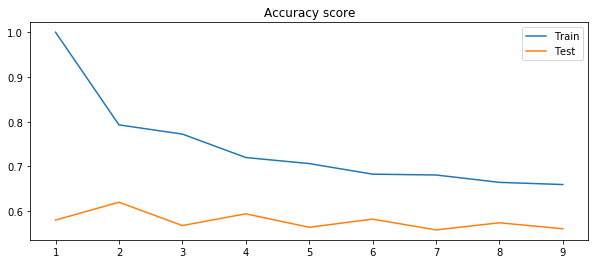

,1,2,3,4
Severity.count in test_data,9,9021,4620,115


CPU times: user 11.5 s, sys: 21.7 ms, total: 11.5 s
Wall time: 11.5 s


In [99]:
%%time
# COmputational time ~
train_accuracy=[]
test_accuracy=[]
k_array=range(1,10)

for i in k_array:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_train)
    acc=accuracy_score(y_train, y_pred)
    train_accuracy.append(acc)

    y_pred = knn.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    test_accuracy.append(acc)

    print("k=",i," Train Accuracy:",train_accuracy[-1],"Test accuracy:",test_accuracy[-1])

plt.figure(figsize=(10,4))
plt.plot(k_array,train_accuracy)
plt.plot(k_array,test_accuracy)
plt.legend(["Train","Test"])
plt.title("Accuracy score")
plt.show()

frame=pd.DataFrame(severity_count_y_test,index=["Severity.count in test_data"])
display(frame)

Using k-NN I have calculated accuracy score for different number of neighbours. k=4 is the optimum value with maximum accuracy score of 65%.

,1,2,3,4
Severity count in test_data,9,9021,4620,115


,Train,Test
Logistic,0.581308,0.599201
KNN,0.792846,0.619906


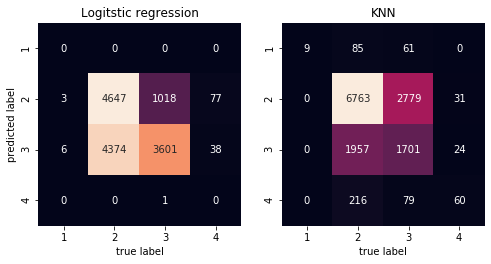

CPU times: user 1.4 s, sys: 12 ms, total: 1.41 s
Wall time: 1.41 s


In [100]:
%%time
#COmputational time ~ 
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_train)
acc_train_knn=accuracy_score(y_train, y_pred)

y_pred = knn.predict(X_test)
acc_test_knn=accuracy_score(y_test, y_pred)

mat_knn = confusion_matrix(y_pred,y_test)

frame=pd.DataFrame(severity_count_y_test,index=["Severity count in test_data"])
display(frame)

frame=pd.DataFrame({"Train":[acc_train_lr,acc_train_knn],
                    "Test":[acc_test_lr,acc_test_knn]},
                   index=["Logistic","KNN"])
display(frame)

plt.figure(figsize=(8,4))

plt.subplot(121)
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Logitstic regression')

plt.subplot(122)
sns.heatmap(mat_knn, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('true label')
plt.title('KNN')

plt.show()



Observation: The above output shows that train accuracy has improved with KNN but and test accuracy is poor. The confusion matrix shows the performance of the classification model on test data. The diagonal of the matrix shows the number of data points with correctly labeled and off-diagonal is the number of data points that are wrongly labeled. From the confusion matrix, it can be observed that both models are wrongly labeling most of the accidents with severity level 3 as 2. Decision Tree Classifier is used to improve accuracy.

<a id='DTC'></a>
#### 3.5 Decision Tree Classifier

In this method, a set of training examples is broken down into smaller and smaller subsets while at the same time an associated decision tree gets incrementally developed. At the end of the learning process, a decision tree covering the training set is returned.

,1,2,3,4
Severity count in test_data,9,9021,4620,115


,Train,Test
Logistic,0.581308,0.599201
KNN,0.792846,0.619906
Decision tree,0.933462,0.730040


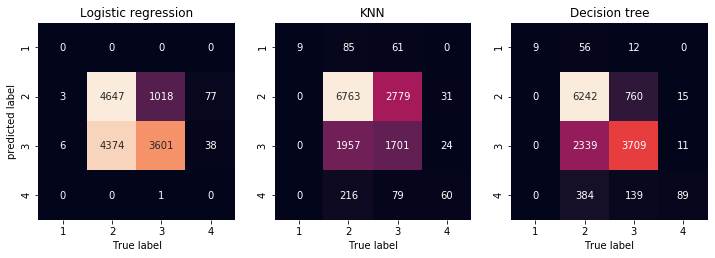

CPU times: user 770 ms, sys: 11.4 ms, total: 782 ms
Wall time: 778 ms


In [101]:
%%time
#Computational time ~
#REF https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac
#REF https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree = DecisionTreeClassifier(max_depth=20,class_weight='balanced')
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
acc_train_dt=accuracy_score(y_train, y_pred)

y_pred = tree.predict(X_test)
acc_test_dt=accuracy_score(y_pred,y_test)
mat_dt = confusion_matrix(y_pred,y_test)

frame=pd.DataFrame(severity_count_y_test,index=["Severity count in test_data"])
display(frame)

frame=pd.DataFrame({"Train":[acc_train_lr,acc_train_knn,acc_train_dt],
                    "Test":[acc_test_lr,acc_test_knn,acc_test_dt]},
                   index=["Logistic","KNN","Decision tree"])
display(frame)

plt.figure(figsize=(12,4))

plt.subplot(131)
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.title('Logistic regression')

plt.subplot(132)
sns.heatmap(mat_knn, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('True label')
plt.title('KNN')

plt.subplot(133)
sns.heatmap(mat_dt, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('True label')
plt.title('Decision tree')

plt.show()


Observation: By using the decision tree, the training accuracy improved to 0.89 and test accuracy to 0.80. The confusion matrix shows that the number of points for which the decision tree is correctly labeling the accidents with severity 3 has improved. Similarly for severity 2. To improve accuracy further, the random forest algorithm is used.

<a id='RFC'></a>
#### 3.6 Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

,1,2,3,4
Severity count in test_data,9,9021,4620,115


,Train,Test
Logistic,0.581308,0.599201
KNN,0.792846,0.619906
Decision tree,0.933462,0.730040
Random forest,1.000000,0.793389


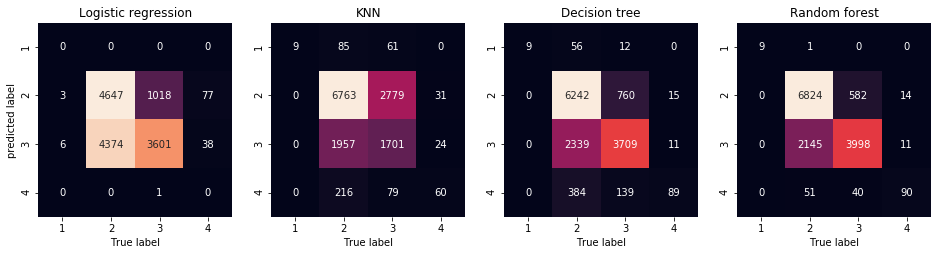

,1,2,3,4
Severity.count in test_data,9,9021,4620,115


CPU times: user 4.28 s, sys: 25.9 ms, total: 4.3 s
Wall time: 4.3 s


In [102]:
%%time
#COmputational time ~ 
#REF https://towardsdatascience.com/understanding-random-forest-58381e0602d2
#REF https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
RF= RandomForestClassifier(n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)

y_pred = RF.predict(X_train)
acc_train_RF=accuracy_score(y_train, y_pred)

y_pred = RF.predict(X_test)
acc_test_RF=accuracy_score(y_pred,y_test)
mat_RF = confusion_matrix(y_pred,y_test)

frame=pd.DataFrame(severity_count_y_test,index=["Severity count in test_data"])
display(frame)

frame=pd.DataFrame({"Train":[acc_train_lr,acc_train_knn,acc_train_dt,acc_train_RF],
                    "Test":[acc_test_lr,acc_test_knn,acc_test_dt,acc_test_RF]},
                   index=["Logistic","KNN","Decision tree","Random forest"])
display(frame)

plt.figure(figsize=(16,4))

plt.subplot(141)
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.title('Logistic regression')

plt.subplot(142)
sns.heatmap(mat_knn, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('True label')
plt.title('KNN')

plt.subplot(143)
sns.heatmap(mat_dt, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('True label')
plt.title('Decision tree')

plt.subplot(144)
sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
plt.xlabel('True label')
plt.title('Random forest')

plt.show()

frame=pd.DataFrame(severity_count_y_test,index=["Severity.count in test_data"])
display(frame)

In [296]:
display(req_data2)

,TMC,Severity,Start_Lat,Start_Lng,Side,City,State,Temperature(F),Humidity(%),Wind_Speed(mph),...,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Day,Weekday,Hour,Minute,Duration
728,1,3,38.085300,-122.233017,1,Vallejo,CA,75.0,48.0,5.8,...,0.0,0.0,0.0,0.0,1,172,1,10,634.0,30.000000
729,1,3,37.631813,-122.084167,1,Hayward,CA,75.0,48.0,4.6,...,0.0,0.0,0.0,0.0,1,172,1,10,630.0,46.383333
730,1,2,37.896564,-122.070717,1,Walnut Creek,CA,82.9,31.0,4.6,...,0.0,0.0,0.0,0.0,1,172,1,10,649.0,30.000000
731,1,3,37.334255,-122.032471,1,Cupertino,CA,75.9,48.0,4.6,...,0.0,0.0,0.0,0.0,1,172,1,10,641.0,30.000000
732,1,2,37.250729,-121.910713,1,San Jose,CA,75.2,41.0,5.8,...,0.0,0.0,0.0,0.0,1,172,1,10,616.0,47.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974286,1,2,37.733491,-122.412121,1,San Francisco,CA,74.0,64.0,7.0,...,0.0,0.0,0.0,0.0,1,235,4,12,766.0,29.083333
2974287,1,2,37.339060,-121.851280,1,San Jose,CA,84.0,45.0,7.0,...,0.0,0.0,0.0,0.0,1,235,4,13,796.0,29.683333
2974290,1,3,37.378708,-121.952142,1,Santa Clara,CA,82.0,52.0,9.0,...,0.0,0.0,0.0,0.0,1,235,4,16,970.0,28.750000
2974291,1,3,37.609816,-122.493720,1,Pacifica,CA,78.0,54.0,7.0,...,0.0,0.0,0.0,0.0,1,235,4,16,979.0,28.716667


In [266]:
display(US_data)

,TMC,Severity,Start_Lat,Start_Lng,Side,City,State,Temperature(F),Humidity(%),Wind_Speed(mph),...,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Day,Weekday,Hour,Minute,Duration
0,1,3,39.865147,-84.058723,1,Dayton,OH,36.9,91.0,7.0,...,0.0,0.0,0.0,0.0,2,39,0,5,346.0,314.000000
1,1,2,39.928059,-82.831184,2,Reynoldsburg,OH,37.9,100.0,7.0,...,0.0,0.0,0.0,0.0,2,39,0,6,367.0,30.000000
2,1,2,39.063148,-84.032608,1,Williamsburg,OH,36.0,100.0,3.5,...,0.0,0.0,0.0,1.0,2,39,0,6,409.0,30.000000
3,1,3,39.747753,-84.205582,1,Dayton,OH,35.1,96.0,4.6,...,0.0,0.0,0.0,0.0,2,39,0,7,443.0,30.000000
4,1,2,39.627781,-84.188354,1,Dayton,OH,36.0,89.0,3.5,...,0.0,0.0,0.0,1.0,1,39,0,7,459.0,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974330,1,2,34.002480,-117.379360,1,Riverside,CA,86.0,40.0,13.0,...,0.0,0.0,0.0,0.0,1,235,4,18,1083.0,28.600000
2974331,1,2,32.766960,-117.148060,1,San Diego,CA,70.0,73.0,6.0,...,0.0,0.0,0.0,0.0,1,235,4,19,1151.0,26.883333
2974332,1,2,33.775450,-117.847790,1,Orange,CA,73.0,64.0,10.0,...,0.0,0.0,0.0,0.0,1,235,4,19,1140.0,28.466667
2974333,1,2,33.992460,-118.403020,1,Culver City,CA,71.0,81.0,8.0,...,0.0,0.0,0.0,0.0,1,235,4,19,1140.0,29.350000


In [267]:
# Resampling

resampled data: 4    5000
3    5000
2    5000
1    5000
Name: Severity, dtype: int64


,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Number,Side,City,State,Temperature(F),...,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Day,Weekday,Hour,Minute,Duration
728,1,3,38.085300,-122.233017,0.000,2717.0,R,Vallejo,CA,75.0,...,False,False,False,False,1,172,1,10,634.0,30.000000
729,1,3,37.631813,-122.084167,0.000,2717.0,R,Hayward,CA,75.0,...,False,False,False,False,1,172,1,10,630.0,46.383333
730,1,2,37.896564,-122.070717,0.000,2717.0,R,Walnut Creek,CA,82.9,...,False,False,False,False,1,172,1,10,649.0,30.000000
731,1,3,37.334255,-122.032471,0.000,2717.0,R,Cupertino,CA,75.9,...,False,False,False,False,1,172,1,10,641.0,30.000000
732,1,2,37.250729,-121.910713,0.000,2717.0,R,San Jose,CA,75.2,...,False,False,False,False,1,172,1,10,616.0,47.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974286,1,2,37.733491,-122.412121,0.192,2717.0,R,San Francisco,CA,74.0,...,False,False,False,False,1,235,4,12,766.0,29.083333
2974287,1,2,37.339060,-121.851280,0.393,2717.0,R,San Jose,CA,84.0,...,False,False,False,False,1,235,4,13,796.0,29.683333
2974290,1,3,37.378708,-121.952142,0.327,2717.0,R,Santa Clara,CA,82.0,...,False,False,False,False,1,235,4,16,970.0,28.750000
2974291,1,3,37.609816,-122.493720,0.109,895.0,R,Pacifica,CA,78.0,...,False,False,False,False,1,235,4,16,979.0,28.716667


Observation: By using Random Forest Classifier, the train and test accuracy is improved to 0.99 and 0.85 respectively. The confusion matrix shows that the number of correct labeling for severity 2 has improved. An investigation is done to further improve the accuracy and by observing the outliers, it is determined that outliers in severity may be affecting accuracy.

<a id='Routliers'></a>
#### 3.7 Removing outliers

In [114]:
req_data3=req_data.loc[req_data["City"].isin(req_cities)]

severity_count={}
severity_count[1]=req_data3[req_data3["Severity"]==1].shape[0]
severity_count[2]=req_data3[req_data3["Severity"]==2].shape[0]
severity_count[3]=req_data3[req_data3["Severity"]==3].shape[0]
severity_count[4]=req_data3[req_data3["Severity"]==4].shape[0]
tot_count=severity_count[1]+severity_count[2]+severity_count[3]+severity_count[4]


frame=pd.DataFrame(severity_count,index=["Severity Count"])
display(frame)

severity_count={}
severity_count[1]=req_data3[req_data3["Severity"]==1].shape[0]/tot_count*100
severity_count[2]=req_data3[req_data3["Severity"]==2].shape[0]/tot_count*100
severity_count[3]=req_data3[req_data3["Severity"]==3].shape[0]/tot_count*100
severity_count[4]=req_data3[req_data3["Severity"]==4].shape[0]/tot_count*100

frame=pd.DataFrame(severity_count,index=["Severity percentage"])
display(frame)

print("Removing outliers")
req_data3=req_data3[~(req_data3["Severity"]==1)]
req_data3=req_data3[~(req_data3["Severity"]==4)]

severity_count={}
severity_count[1]=req_data3[req_data3["Severity"]==1].shape[0]
severity_count[2]=req_data3[req_data3["Severity"]==2].shape[0]
severity_count[3]=req_data3[req_data3["Severity"]==3].shape[0]
severity_count[4]=req_data3[req_data3["Severity"]==4].shape[0]

frame=pd.DataFrame(severity_count,index=["Severity count"])
display(frame)


,1,2,3,4
Severity Count,72,90870,45704,1002


,1,2,3,4
Severity percentage,0.052307,66.016215,33.203534,0.727944


Removing outliers


,1,2,3,4
Severity count,0,90870,45704,0


Observation: In the above frames, it is observed that severity levels 1 and 4 are only around 1%. The analysis is done by removing the data with severity levels 1 and 4 to improve prediction accuracy.

#### Train test split

In [115]:
%%time
#Computational time ~
#selecting input columns and output columns for training

x_clmns=list(US_data.columns)
x_clmns.remove("Severity")
x_clmns.remove("City")
x_clmns.remove("State")
y_clmns=["Severity"]

X=req_data3[x_clmns].values
y=req_data3[y_clmns].values

y=np.reshape(y,(-1,1))
y=y[:,]

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y[:,0], test_size=0.1,random_state=21)

print("Train size:",X_train.shape[0])
print("Test size:",X_test.shape[0])

severity_count_y_test_no_outliers={}
severity_count_y_test_no_outliers[1]=y_test[y_test==1].shape[0]
severity_count_y_test_no_outliers[2]=y_test[y_test==2].shape[0]
severity_count_y_test_no_outliers[3]=y_test[y_test==3].shape[0]
severity_count_y_test_no_outliers[4]=y_test[y_test==4].shape[0]

frame=pd.DataFrame(severity_count_y_test_no_outliers,index=["Severity count in test_data"])
display(frame)

Train size: 122916
Test size: 13658


,1,2,3,4
Severity count in test_data,0,9058,4600,0


CPU times: user 66.2 ms, sys: 1 ms, total: 67.2 ms
Wall time: 66.9 ms


#### Decision Tree Classifier

,1,2,3,4
Severity count in test_data,0,9058,4600,0


,Train,Test
Logistic,0.511611,0.322121
KNN,0.832278,0.529677
Decision tree,0.968833,0.717690
Random forest,1.000000,0.772757
Decision tree:No outliers,0.937315,0.869161


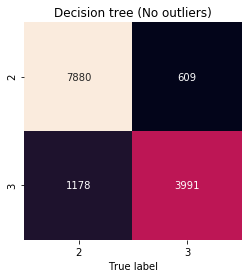

CPU times: user 2.48 s, sys: 4.99 ms, total: 2.48 s
Wall time: 2.48 s


In [116]:
%%time
#COmputational time ~
#Decision Tree Classifier after removing outliers
tree = DecisionTreeClassifier(max_depth=20,class_weight='balanced')
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
acc_train_dt_no_outliers=accuracy_score(y_train, y_pred)

y_pred = tree.predict(X_test)
acc_test_dt_no_outliers=accuracy_score(y_pred,y_test)
mat_dt_no_outliers = confusion_matrix(y_pred,y_test)

frame=pd.DataFrame(severity_count_y_test_no_outliers,index=["Severity count in test_data"])
display(frame)

frame=pd.DataFrame({"Train":[acc_train_lr,acc_train_knn,acc_train_dt,acc_train_RF,acc_train_dt_no_outliers],
                    "Test":[acc_test_lr,acc_test_knn,acc_test_dt,acc_test_RF,acc_test_dt_no_outliers]},
                   index=["Logistic","KNN","Decision tree","Random forest","Decision tree:No outliers"])
display(frame)

plt.figure(figsize=(4,4))
sns.heatmap(mat_dt_no_outliers, square=True, annot=True, fmt='d', cbar=False,xticklabels=[2,3],yticklabels=[2,3])
plt.xlabel('True label')
plt.title('Decision tree (No outliers)')
plt.show()


Observation: After removing outliers, train accuracy using Decision Tree has improved from 0.893 to 0.937 and test accuracy of Decision Tree is improved from 0.808 to 0.869.

#### Random Forest Classifier

,1,2,3,4
Severity count in test_data,0,9058,4600,0


,Train,Test
Logistic,0.511611,0.322121
KNN,0.832278,0.529677
Decision tree,0.968833,0.717690
Random forest,1.000000,0.772757
Decision tree:No outliers,0.937315,0.869161
Random forest:No outliers,0.999967,0.880802


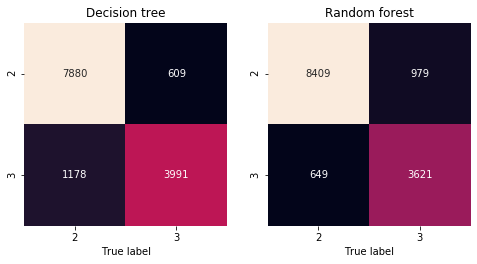

CPU times: user 45.7 s, sys: 13.6 ms, total: 45.7 s
Wall time: 45.8 s


In [117]:
%%time
#Computational time ~ 
RF= RandomForestClassifier(n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)

y_pred = RF.predict(X_train)
acc_train_RF_outliers=accuracy_score(y_train, y_pred)

y_pred = RF.predict(X_test)
acc_test_RF_outliers=accuracy_score(y_pred,y_test)
mat_rf_no_outliers = confusion_matrix(y_pred,y_test)

frame=pd.DataFrame(severity_count_y_test_no_outliers,index=["Severity count in test_data"])
display(frame)

frame=pd.DataFrame({"Train":[acc_train_lr,acc_train_knn,acc_train_dt,acc_train_RF,acc_train_dt_no_outliers,acc_train_RF_outliers],
                    "Test":[acc_test_lr,acc_test_knn,acc_test_dt,acc_test_RF,acc_test_dt_no_outliers,acc_test_RF_outliers]},
                   index=["Logistic","KNN","Decision tree","Random forest","Decision tree:No outliers","Random forest:No outliers"])
display(frame)

plt.figure(figsize=(8,4))
plt.subplot(121)
sns.heatmap(mat_dt_no_outliers, square=True, annot=True, fmt='d', cbar=False,xticklabels=[2,3],yticklabels=[2,3])
plt.xlabel('True label')
plt.title('Decision tree')

plt.subplot(122)
sns.heatmap(mat_rf_no_outliers, square=True, annot=True, fmt='d', cbar=False,xticklabels=[2,3],yticklabels=[2,3])
plt.xlabel('True label')
plt.title('Random forest')

plt.show()


By using random forest, the test accuracy has been improved to 0.88 and number of correct labeling for severity level 2 has improved 

<a id='Summary'></a>
#### 4.0 Summary and conclusions

A large dataset of around 1 GB consists of 3 million accidents is used in this project. To analyze the accidents, the dataset is cleaned systematically and EDA is performed using several iterations. 

The computational power of my laptop is not sufficient to build a model on the entire dataset. From Exploratory Data Analysis (EDA), it is observed that the state California has more accidents compared to other states, and the San Francisco bay area has around one-fifth of California accidents. Hence machine learning models are developed to predict accident severity for the California bay area.

Initially, basic models such as Logistic Regression and KNN were used to build the predictive model. The models yielded poor accuracy and hence the accuracy was improved by using models: Decision tree Classifier, Random Forest Classifier. Random forest algorithm predicted severity with a training and test accuracy of 0.99996 and 0.854195 respectively. 

To further improve the accuracy, outliers in severity levels are removed and a train and test accuracy of 0.999976 and    0.879851 is achieved respectively.